
### Use Global Infection Data to Analysis


In [1]:
import pandas as pd

# Read the Excel file
try:
    df = pd.read_excel('world_covid.xlsx')
    print("Excel file read successfully")
except FileNotFoundError:
    print("File not found, please check the file path")
    raise

# Assume there is a 'date' column and a 'new_cases' column in the data
# Convert the 'date' column to datetime type
try:
    df['date'] = pd.to_datetime(df['date'])
    print("Date column converted successfully")
except KeyError:
    print("Date column 'date' not found, please check the column name")
    raise

# Group by month and calculate the total cases for each month
try:
    df['month'] = df['date'].dt.to_period('M')
    monthly_cases = df.groupby('month')['new_cases'].sum()
    print("Monthly cases calculated successfully")
except KeyError:
    print("Cases column 'new_cases' not found, please check the column name")
    raise

# Save the result in a new DataFrame
result_df_world = pd.DataFrame({
    'month': monthly_cases.index.astype(str),
    'new_cases': monthly_cases.values
})

# Display the result
print(result_df_world)

Excel file read successfully
Date column converted successfully
Monthly cases calculated successfully
      month  new_cases
0   2020-01       2033
1   2020-02      76214
2   2020-03     611707
3   2020-04    2037922
4   2020-05    3163451
5   2020-06    3936842
6   2020-07    6074723
7   2020-08    9261926
8   2020-09    8143085
9   2020-10   10187462
10  2020-11   19566436
11  2020-12   17255870
12  2021-01   22070633
13  2021-02   11022033
14  2021-03   12861645
15  2021-04   19601773
16  2021-05   23734840
17  2021-06   10822935
18  2021-07   13410750
19  2021-08   22253836
20  2021-09   15484337
21  2021-10   15086099
22  2021-11   14569045
23  2021-12   19380554
24  2022-01   94694159
25  2022-02   59761654
26  2022-03   46082485
27  2022-04   26970423
28  2022-05   18751417
29  2022-06   15145267
30  2022-07   32981058
31  2022-08   22850430
32  2022-09   14173487
33  2022-10   15057500
34  2022-11   10483582
35  2022-12   67065915
36  2023-01   47674052
37  2023-02    4851818
3

In [2]:
import pandas as pd
from dateutil import parser

# Read the existing result_df DataFrame
# Assume result_df already exists and contains 'month' and 'new_cases' columns

# Convert the 'month' column in result_df to Period type
result_df_world['month'] = pd.to_datetime(result_df_world['month']).dt.to_period('M')

# Read the Monthly_figures_on_aviation CSV file
aviation_df = pd.read_csv('Monthly_figures_on_aviation.csv')

# Assume aviation_df has a date column 'Periods' and other data columns
# Use dateutil.parser to parse the date column
aviation_df['date'] = aviation_df['Periods'].apply(lambda x: parser.parse(x, fuzzy=True))

# Group by month
aviation_df['month'] = aviation_df['date'].dt.to_period('M')

# Drop the original date column
aviation_df = aviation_df.drop(columns=['Periods'])

# Merge the two DataFrames by month, filling unmatched months with 0 for new_cases
merged_df = pd.merge(result_df_world, aviation_df, on='month', how='outer').fillna({'new_cases': 0})

# Display the result
print(merged_df)

      month  new_cases              Airports  \
0   2019-01        0.0  Total Dutch airports   
1   2019-02        0.0  Total Dutch airports   
2   2019-03        0.0  Total Dutch airports   
3   2019-04        0.0  Total Dutch airports   
4   2019-05        0.0  Total Dutch airports   
..      ...        ...                   ...   
63  2024-04   147440.0  Total Dutch airports   
64  2024-05   136159.0  Total Dutch airports   
65  2024-06   190568.0  Total Dutch airports   
66  2024-07   201714.0  Total Dutch airports   
67  2024-08    47169.0  Total Dutch airports   

    Aircraft movements/Cross-country flights (number)  \
0                                               43492   
1                                               41972   
2                                               47712   
3                                               51400   
4                                               55561   
..                                                ...   
63                      

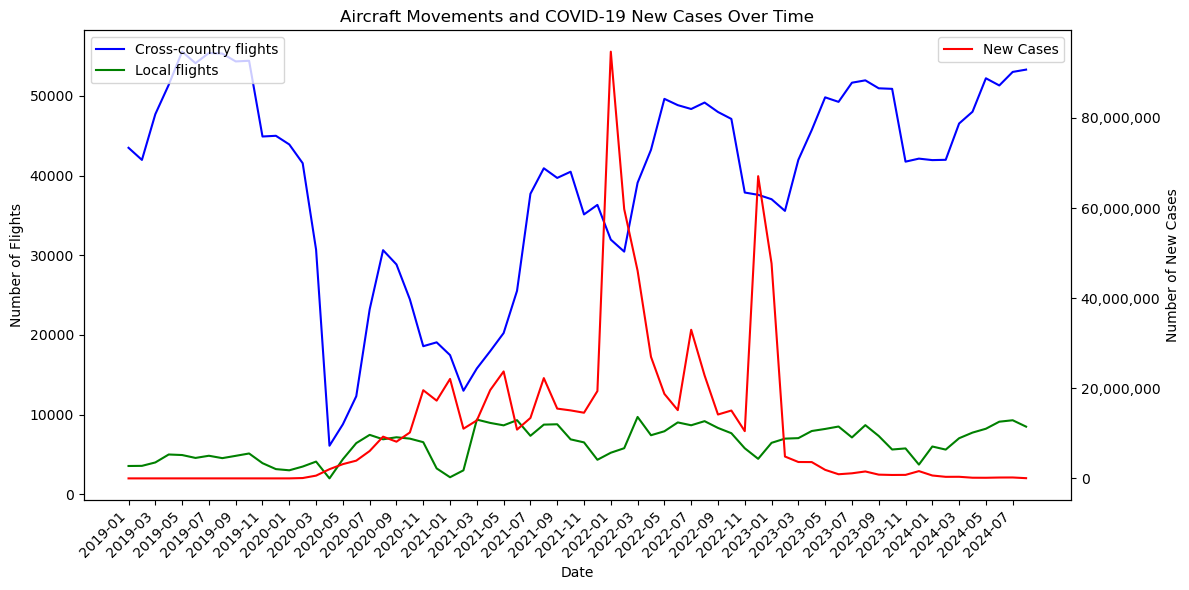

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert 'month' column to string format for plotting
merged_df['month'] = merged_df['month'].astype(str)

# Set the figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first three columns as line charts on the first y-axis
ax1.plot(merged_df['month'], merged_df['Aircraft movements/Cross-country flights (number)'], label='Cross-country flights', color='blue')
ax1.plot(merged_df['month'], merged_df['Aircraft movements/Local flights (number)'], label='Local flights', color='green')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Flights')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases')
ax2.legend(loc='upper right')

# Format the second y-axis to remove scientific notation
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the plot
plt.show()

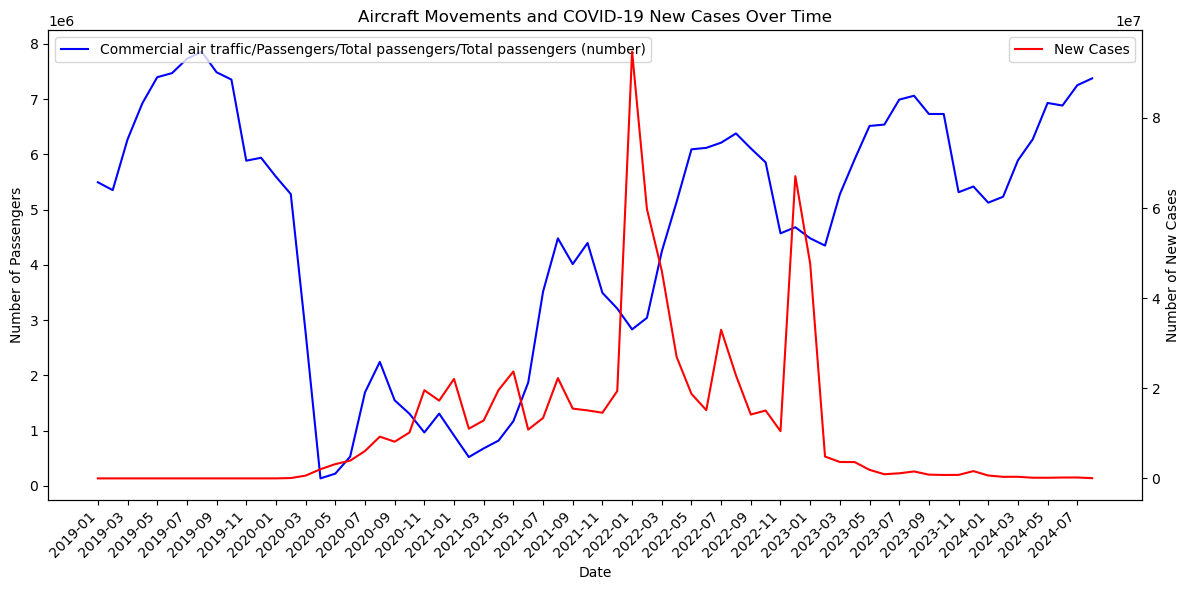

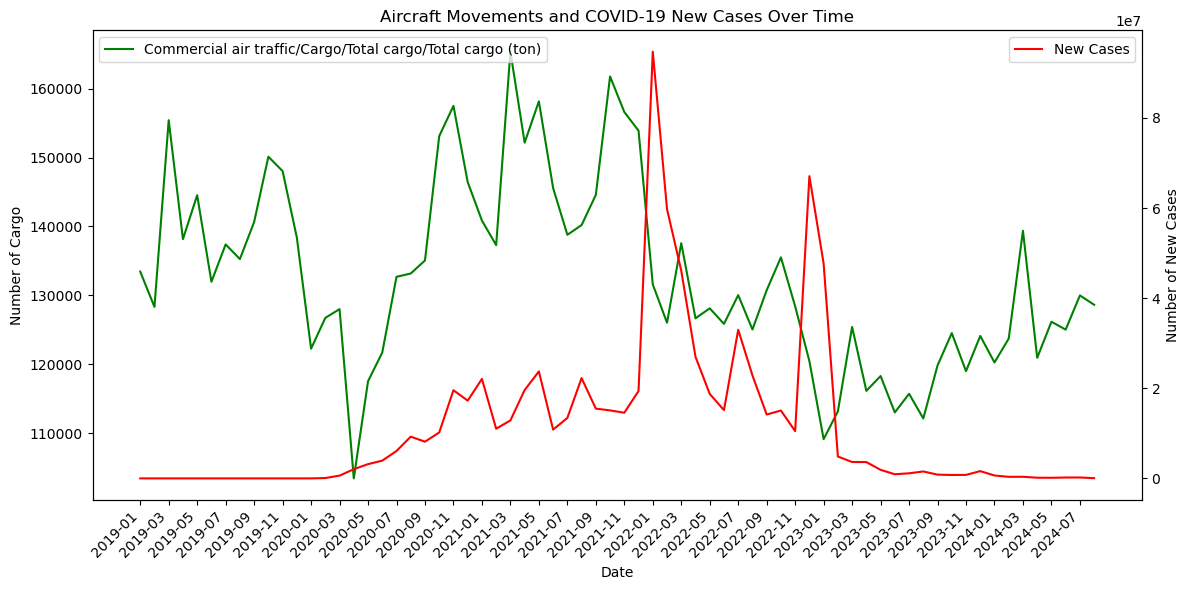

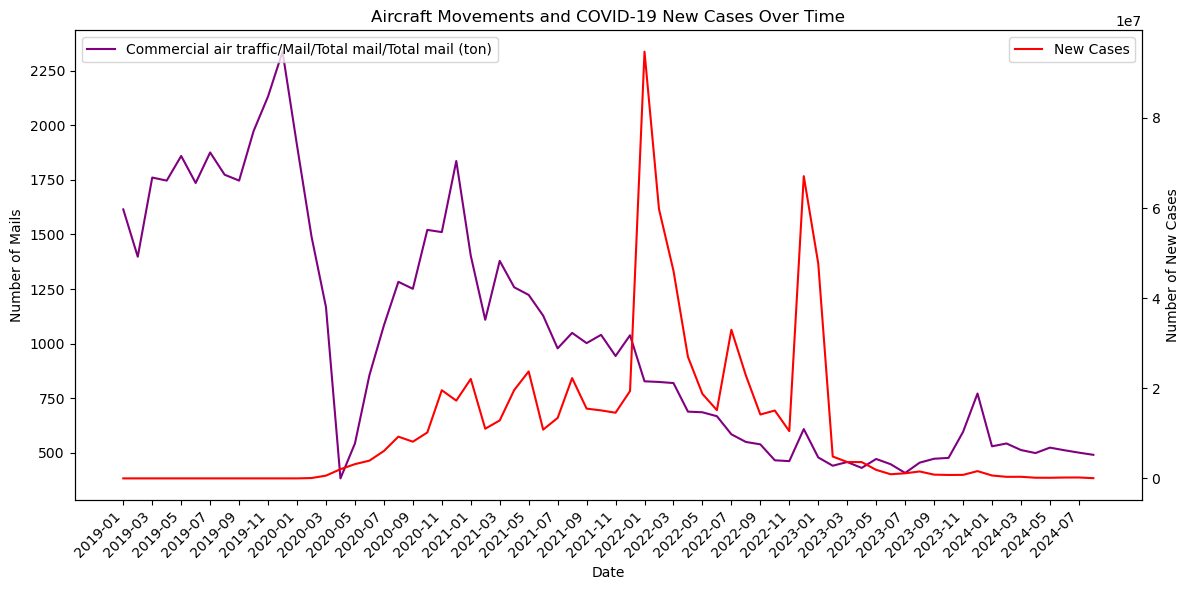

In [4]:
import matplotlib.pyplot as plt

# Convert 'month' column to string format for plotting
merged_df['month'] = merged_df['month'].astype(str)

# Set the figure size for the first plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first of the last three columns as a line chart on the first y-axis
ax1.plot(merged_df['month'], merged_df.iloc[:, -4], label=merged_df.columns[-4], color='blue')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Passengers')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the first plot
plt.show()

# Set the figure size for the second plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the second of the last three columns as a line chart on the first y-axis
ax1.plot(merged_df['month'], merged_df.iloc[:, -3], label=merged_df.columns[-3], color='green')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Cargo')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the second plot
plt.show()

# Set the figure size for the third plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the third of the last three columns as a line chart on the first y-axis
ax1.plot(merged_df['month'], merged_df.iloc[:, -2], label=merged_df.columns[-2], color='purple')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Mails')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the third plot
plt.show()

### Correlation Coefficient Calculation

In this section, we calculate the correlation coefficient between each variable and the number of new COVID-19 cases. The variables analyzed include:

- Aircraft movements/Local flights (number)
- Aircraft movements/Cross-country flights (number)
- Commercial air traffic/Passengers/Total passengers/Total passengers (number)
- Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
- Commercial air traffic/Mail/Total mail/Total mail (ton)

The correlation coefficients are as follows:

- **Aircraft movements/Local flights (number)**: 0.111562
- **Commercial air traffic/Cargo/Total cargo/Total cargo (ton)**: 0.061415
- **Commercial air traffic/Mail/Total mail/Total mail (ton)**: -0.163440
- **Aircraft movements/Cross-country flights (number)**: -0.252523
- **Commercial air traffic/Flights/All flights/Total flights (number)**: -0.261317
- **Commercial air traffic/Flights/All flights/Scheduled (number)**: -0.262728
- **Commercial air traffic/Passengers/Total passengers/Total passengers (number)**: -0.299222

These coefficients indicate the strength and direction of the linear relationship between each variable and the number of new COVID-19 cases.
```

In [5]:
# Calculate the correlation coefficient between each variable and the number of new cases
correlation_with_cases = {}

# Iterate through each column in merged_df and calculate the correlation with new_cases
for column in merged_df.columns:
    # Exclude columns that are not relevant for correlation calculation
    if column not in ['new_cases', 'date', 'month', 'Airports'] and merged_df[column].dtype in ['int64', 'float64']:
        correlation_with_cases[column] = merged_df['new_cases'].corr(merged_df[column])

# Convert the result to a Series and sort by correlation coefficient
correlation_with_cases = pd.Series(correlation_with_cases).sort_values(ascending=False)

# Display the result
print(correlation_with_cases)

Aircraft movements/Local flights (number)                                       0.111562
Commercial air traffic/Cargo/Total cargo/Total cargo (ton)                      0.061415
Commercial air traffic/Mail/Total mail/Total mail (ton)                        -0.163440
Aircraft movements/Cross-country flights (number)                              -0.252523
Commercial air traffic/Flights/All flights/Total flights (number)              -0.261317
Commercial air traffic/Flights/All flights/Scheduled (number)                  -0.262728
Commercial air traffic/Passengers/Total passengers/Total passengers (number)   -0.299222
dtype: float64


### Attempting Linear Regression

In this section, we will attempt to use a Linear Regression model to predict various aviation-related variables based on the number of new COVID-19 cases. The variables we will analyze include:

- Aircraft movements/Local flights (number)
- Aircraft movements/Cross-country flights (number)
- Commercial air traffic/Passengers/Total passengers/Total passengers (number)
- Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
- Commercial air traffic/Mail/Total mail/Total mail (ton)

We will split the data into training and testing sets, fit the Linear Regression model, and evaluate its performance using metrics such as Mean Squared Error (MSE) and R-squared (R²). Additionally, we will visualize the actual vs. predicted values for each variable.

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
# List of variables for regression analysis
variables = [
    'Aircraft movements/Local flights (number)',
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]
# Prepare data
X = merged_df[['new_cases']]  # Convert X to DataFrame

# Iterate over each variable and perform linear regression
for variable in variables:
    Y = merged_df[[variable]]  # Convert Y to DataFrame
    
    # Create linear regression model
    model = LinearRegression()
    
    # Fit the model
    model.fit(X, Y)
    
    # Output regression coefficients
    coefficient = model.coef_[0][0]
    print(f"Coefficient for {variable}: {coefficient}")
    
    # Output intercept
    intercept = model.intercept_[0]
    print(f"Intercept for {variable}: {intercept}")
    
    # Calculate R^2
    r_squared = model.score(X, Y)
    print(f"R^2 for {variable}: {r_squared}\n")

Coefficient for Aircraft movements/Local flights (number): 1.3201143811507558e-05
Intercept for Aircraft movements/Local flights (number): 6194.467201825774
R^2 for Aircraft movements/Local flights (number): 0.01244599332928431

Coefficient for Aircraft movements/Cross-country flights (number): -0.00018643224332561418
Intercept for Aircraft movements/Cross-country flights (number): 41547.94578458086
R^2 for Aircraft movements/Cross-country flights (number): 0.06376777980850645

Coefficient for Commercial air traffic/Passengers/Total passengers/Total passengers (number): -0.038948333415613365
Intercept for Commercial air traffic/Passengers/Total passengers/Total passengers (number): 5111760.916307338
R^2 for Commercial air traffic/Passengers/Total passengers/Total passengers (number): 0.08953360204106742

Coefficient for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 4.76767978446442e-05
Intercept for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 132175.380899

### Linear Regression Model Fit Evaluation

To evaluate the fit of the Linear Regression model, we will plot the actual vs. predicted values for each variable. This will help us visually inspect how well the model is performing.

Below are the plots for each variable:

1. **Aircraft movements/Local flights (number)**
2. **Aircraft movements/Cross-country flights (number)**
3. **Commercial air traffic/Passengers/Total passengers/Total passengers (number)**
4. **Commercial air traffic/Cargo/Total cargo/Total cargo (ton)**
5. **Commercial air traffic/Mail/Total mail/Total mail (ton)**

Each plot will show the actual values in blue and the predicted values in red (dashed line).


Coefficient for Aircraft movements/Local flights (number): 1.3201143811507558e-05
Intercept for Aircraft movements/Local flights (number): 6194.467201825774
R^2 for Aircraft movements/Local flights (number): 0.01244599332928431



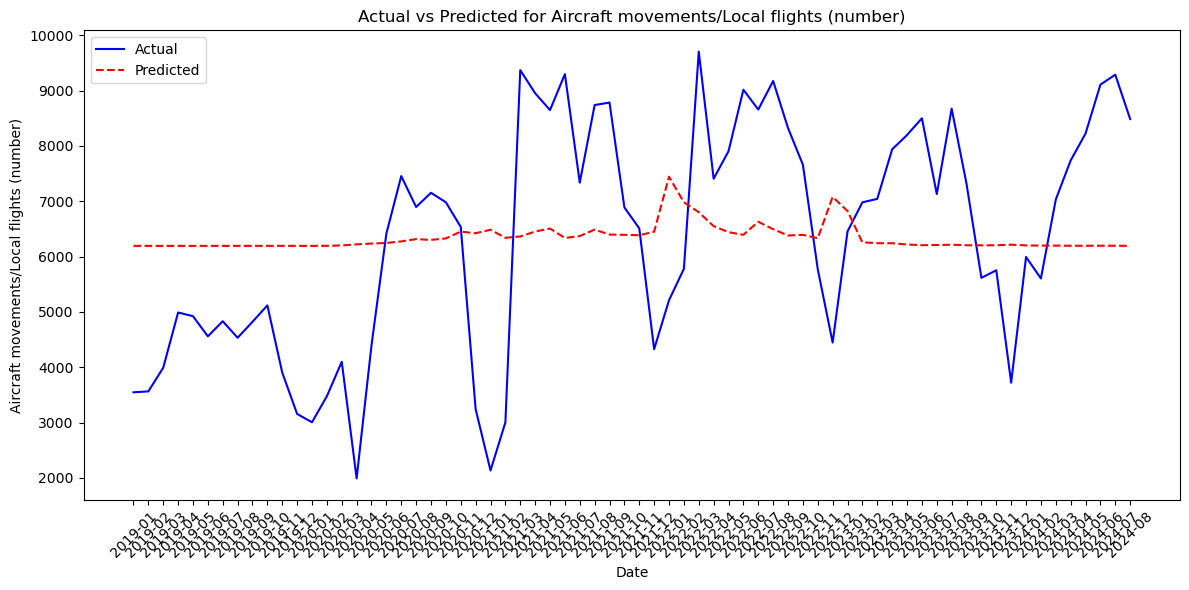

Coefficient for Aircraft movements/Cross-country flights (number): -0.00018643224332561418
Intercept for Aircraft movements/Cross-country flights (number): 41547.94578458086
R^2 for Aircraft movements/Cross-country flights (number): 0.06376777980850645



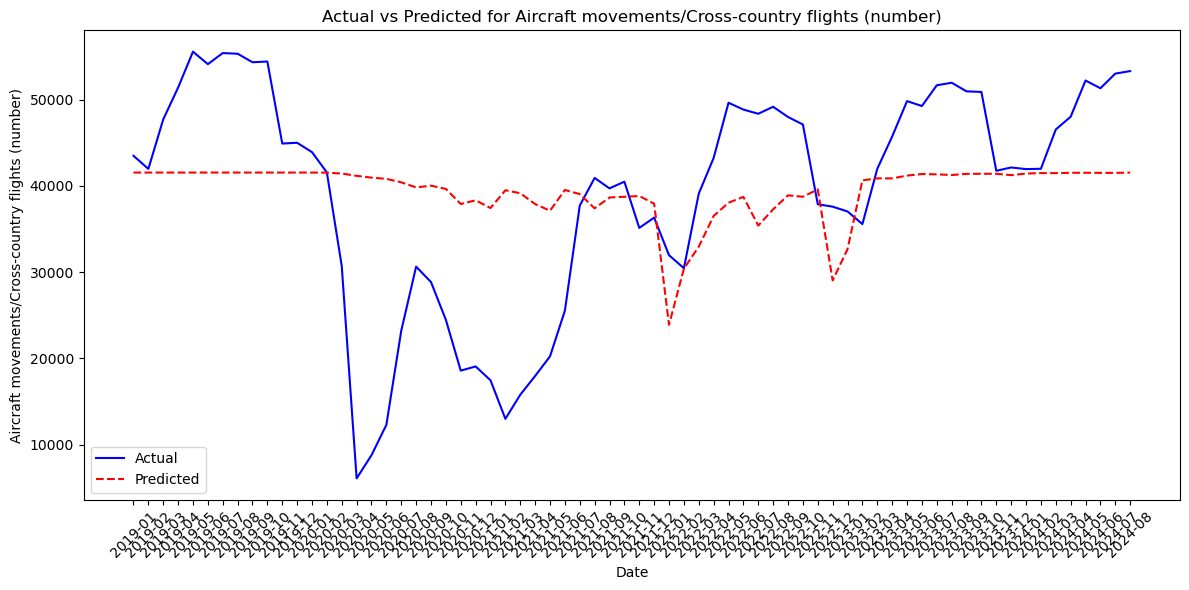

Coefficient for Commercial air traffic/Passengers/Total passengers/Total passengers (number): -0.038948333415613365
Intercept for Commercial air traffic/Passengers/Total passengers/Total passengers (number): 5111760.916307338
R^2 for Commercial air traffic/Passengers/Total passengers/Total passengers (number): 0.08953360204106742



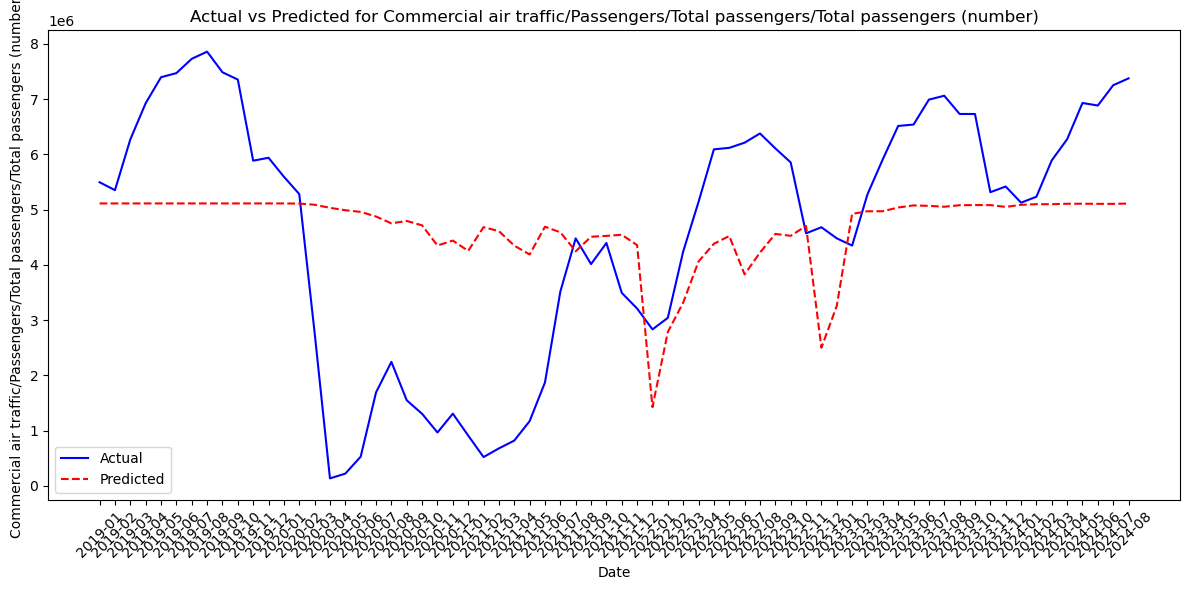

Coefficient for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 4.76767978446442e-05
Intercept for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 132175.3808992182
R^2 for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 0.00377183768229461



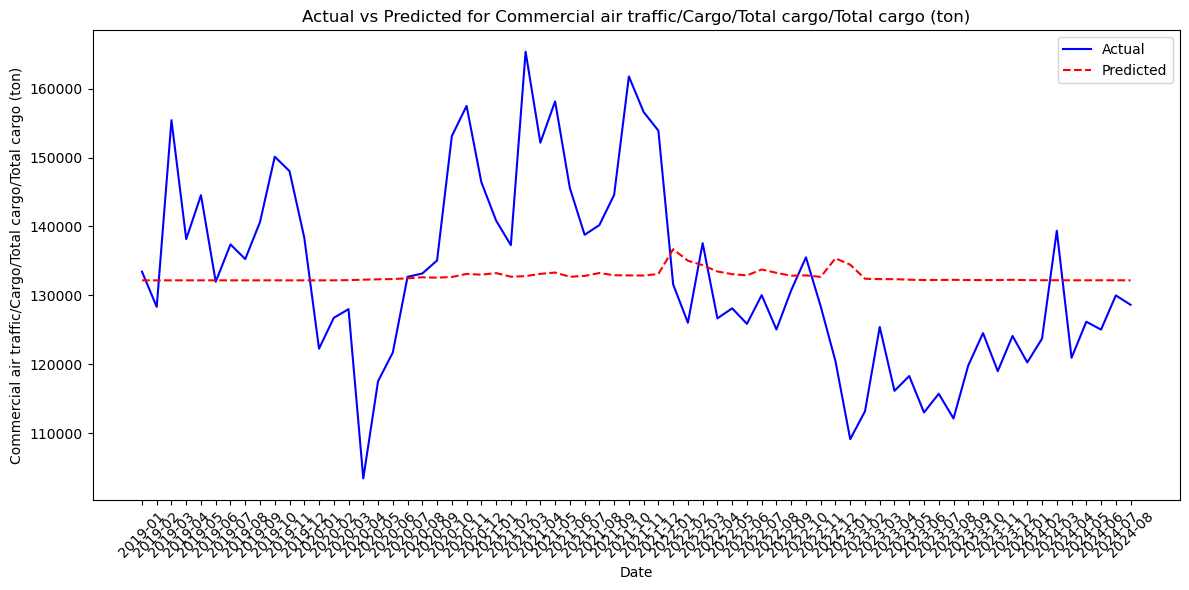

Coefficient for Commercial air traffic/Mail/Total mail/Total mail (ton): -4.991903830006288e-06
Intercept for Commercial air traffic/Mail/Total mail/Total mail (ton): 1057.8146056305065
R^2 for Commercial air traffic/Mail/Total mail/Total mail (ton): 0.02671279535464821



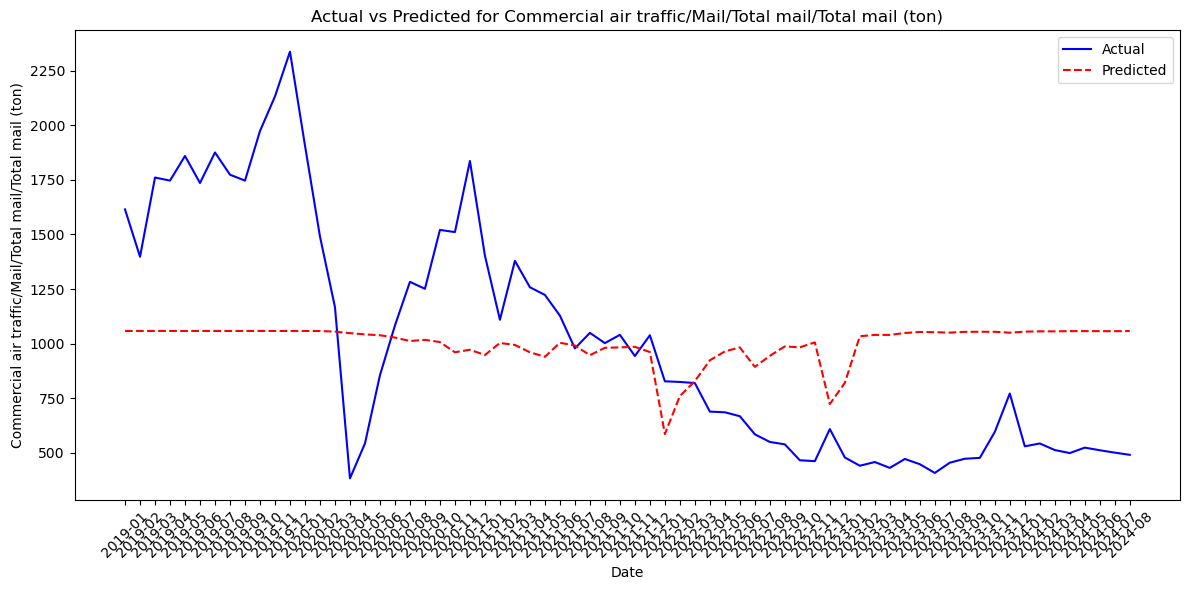

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# List of variables for regression analysis
variables = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# Prepare data
X = merged_df[['new_cases']]  # Convert X to DataFrame

# Iterate over each variable and perform linear regression
for variable in variables:
    Y = merged_df[[variable]]  # Convert Y to DataFrame
    
    # Create linear regression model
    model = LinearRegression()
    
    # Fit the model
    model.fit(X, Y)
    
    # Predict
    y_pred = model.predict(X)
    
    # Output regression coefficients
    coefficient = model.coef_[0][0]
    print(f"Coefficient for {variable}: {coefficient}")
    
    # Output intercept
    intercept = model.intercept_[0]
    print(f"Intercept for {variable}: {intercept}")
    
    # Calculate R^2
    r_squared = model.score(X, Y)
    print(f"R^2 for {variable}: {r_squared}\n")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['month'], Y, label='Actual', color='blue')
    plt.plot(merged_df['month'], y_pred, label='Predicted', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.title(f'Actual vs Predicted for {variable}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Time Series Analysis

In this section, we will perform a time series analysis on the aviation-related variables and the number of new COVID-19 cases. The analysis will include the following steps:

1. **Data Preprocessing**: Convert the date column to datetime format and set it as the index.
2. **Time Series Decomposition**: Decompose the time series data into trend, seasonal, and residual components.
3. **Stationarity Test**: Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity.
4. **Differencing**: Apply differencing to achieve stationarity if necessary.
5. **Granger Causality Test**: Conduct the Granger causality test to determine if the number of new COVID-19 cases can predict other variables.

The variables we will analyze include:

- Aircraft movements/Local flights (number)
- Aircraft movements/Cross-country flights (number)
- Commercial air traffic/Passengers/Total passengers/Total passengers (number)
- Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
- Commercial air traffic/Mail/Total mail/Total mail (ton)

We will visualize the decomposed components and the results of the ADF test to understand the underlying patterns and trends in the data.

              month  new_cases              Airports  \
date                                                   
2019-01-07  2019-01        0.0  Total Dutch airports   
2019-02-07  2019-02        0.0  Total Dutch airports   
2019-03-07  2019-03        0.0  Total Dutch airports   
2019-04-07  2019-04        0.0  Total Dutch airports   
2019-05-07  2019-05        0.0  Total Dutch airports   

            Aircraft movements/Cross-country flights (number)  \
date                                                            
2019-01-07                                              43492   
2019-02-07                                              41972   
2019-03-07                                              47712   
2019-04-07                                              51400   
2019-05-07                                              55561   

            Aircraft movements/Local flights (number)  \
date                                                    
2019-01-07                           

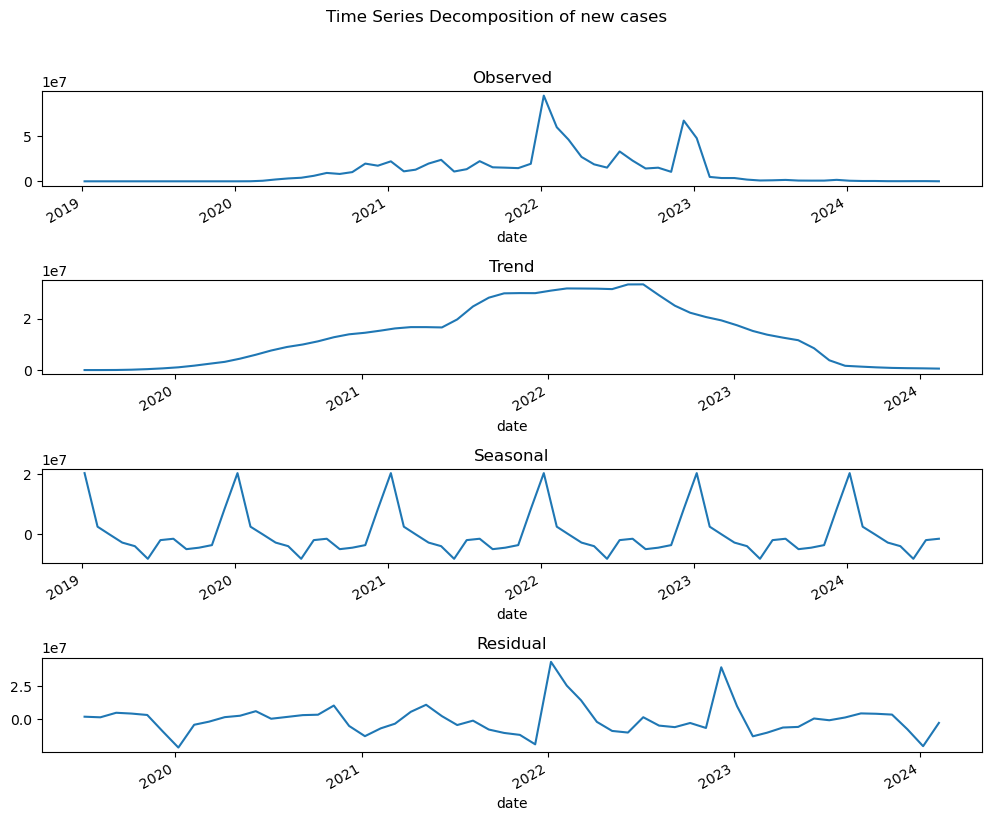

Augmented Dickey-Fuller Test: New Cases
ADF Test Statistic             -3.671978
p-value                         0.004525
#Lags Used                      0.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357



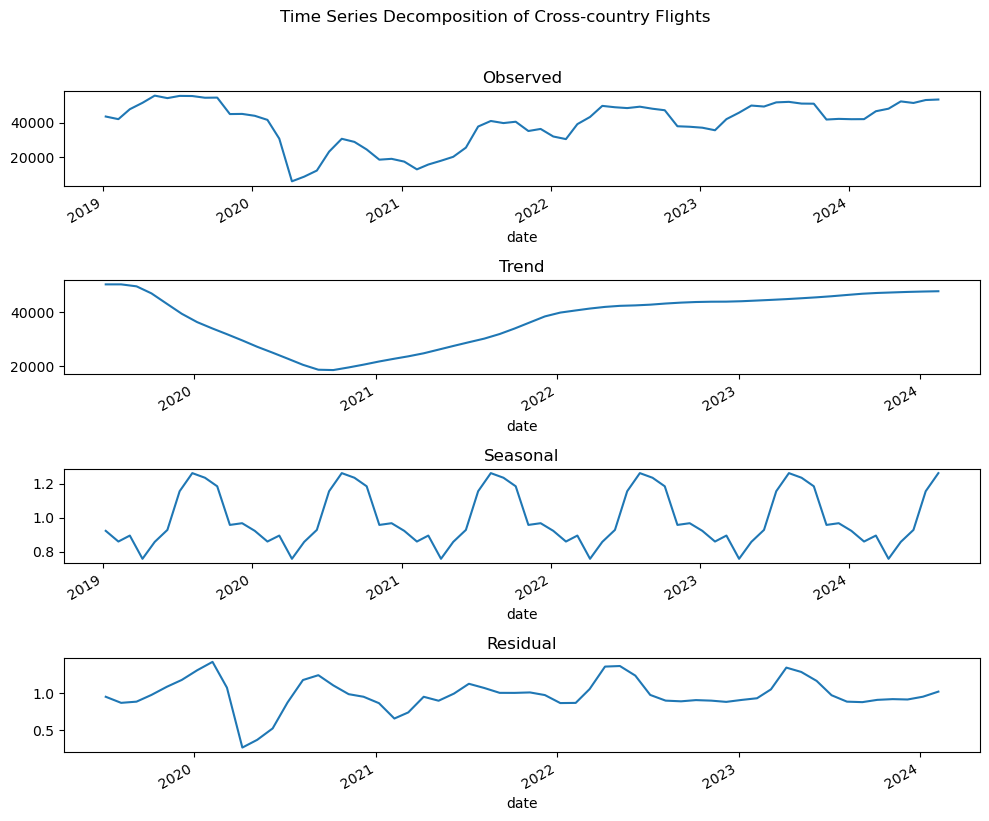

Augmented Dickey-Fuller Test: Cross-country Flights
ADF Test Statistic             -1.724184
p-value                         0.418697
#Lags Used                      9.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129



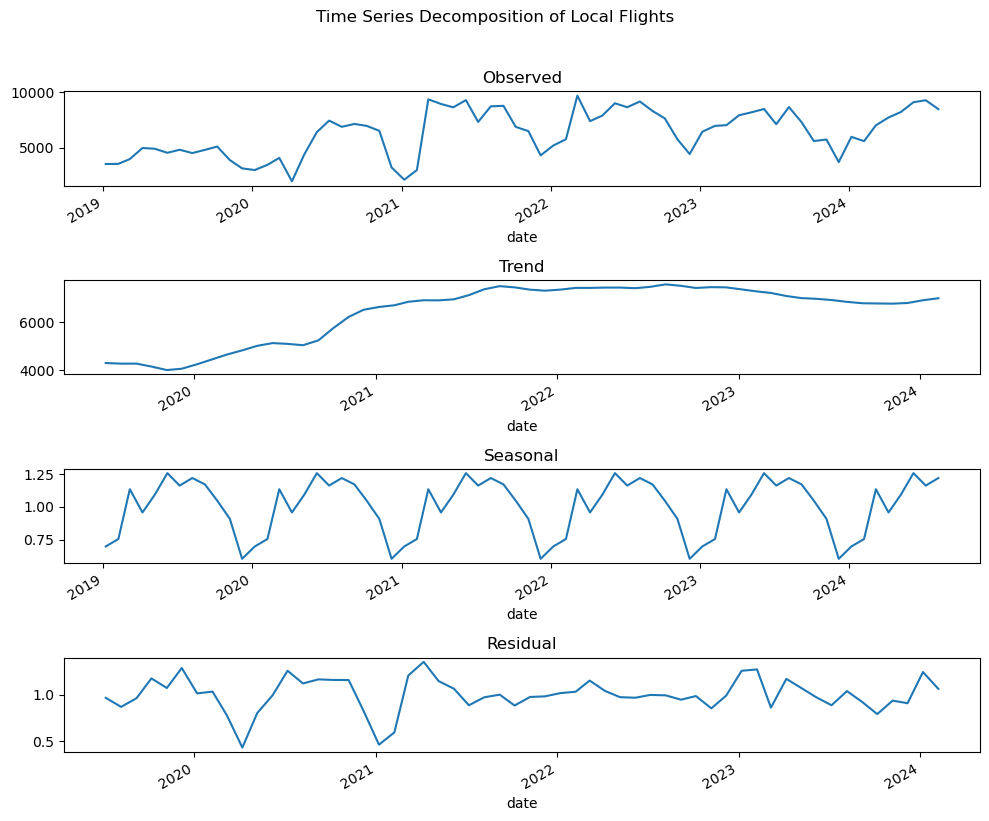

Augmented Dickey-Fuller Test: Local Flights
ADF Test Statistic             -3.177268
p-value                         0.021339
#Lags Used                      0.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357



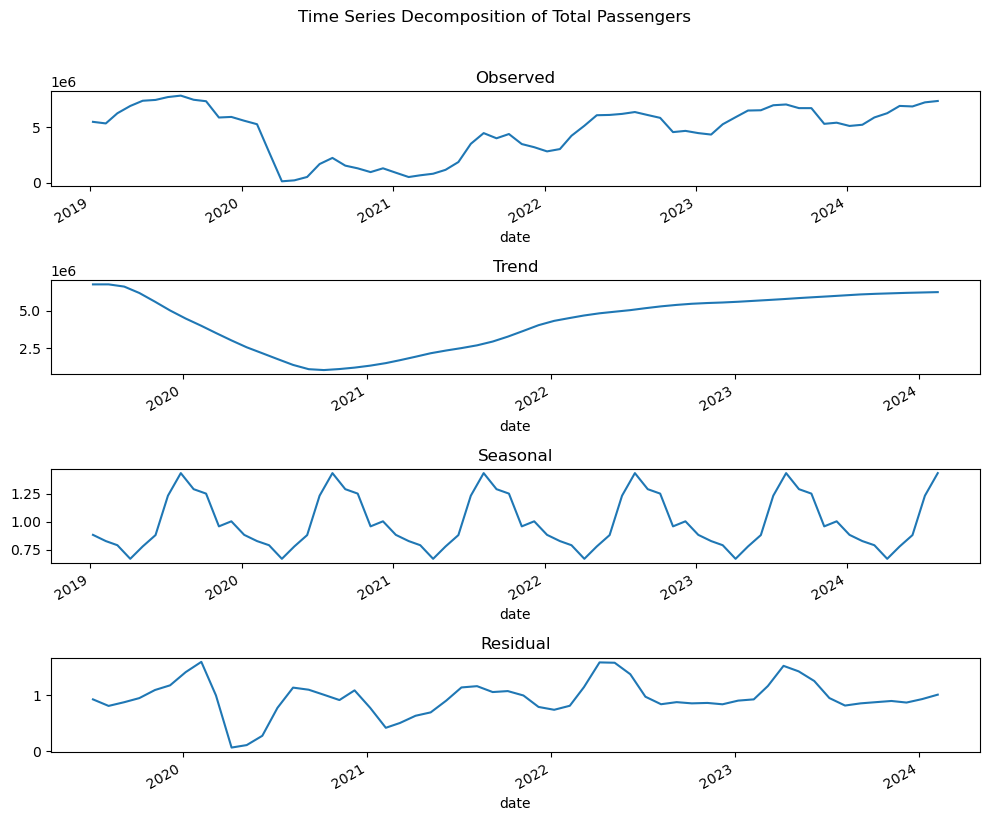

Augmented Dickey-Fuller Test: Total Passengers
ADF Test Statistic             -1.920286
p-value                         0.322579
#Lags Used                      1.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724



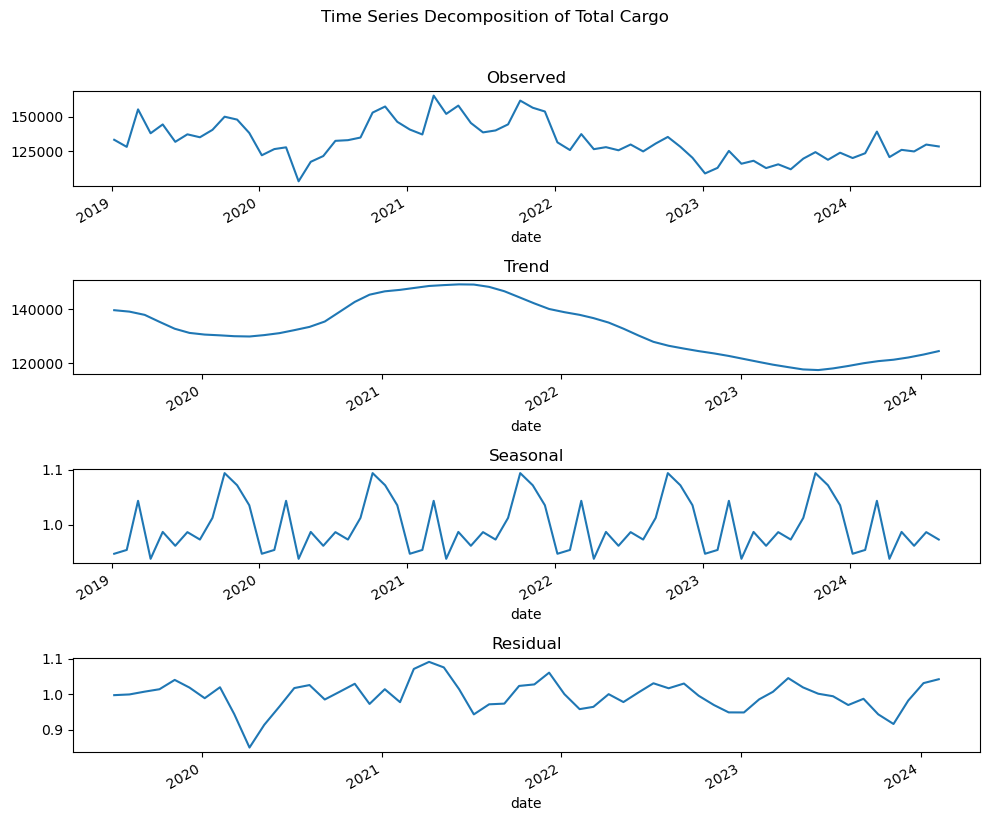

Augmented Dickey-Fuller Test: Total Cargo
ADF Test Statistic             -3.264005
p-value                         0.016566
#Lags Used                      0.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357



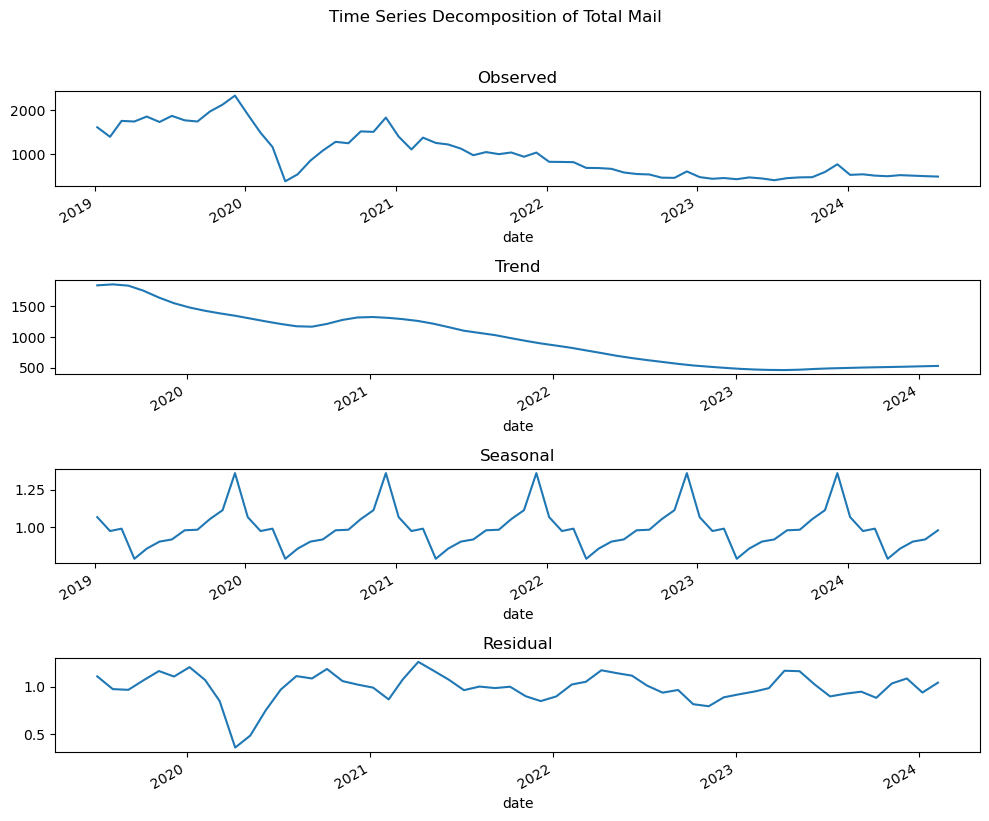

Augmented Dickey-Fuller Test: Total Mail
ADF Test Statistic             -1.456691
p-value                         0.554817
#Lags Used                      8.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Assume merged_df contains 'date', 'new_cases', 'Aircraft movements/Cross-country flights (number)', 'Aircraft movements/Local flights (number)',
# 'Commercial air traffic/Passengers/Total passengers/Total passengers (number)', 'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
# 'Commercial air traffic/Mail/Total mail/Total mail (ton)' columns
# Preprocess data
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df.set_index('date', inplace=True)

# View data structure
print(merged_df.head())

# Define a function to perform ADF test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('')

# Time series decomposition for new cases
result_variable0 = seasonal_decompose(merged_df['new_cases'], model='additive', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result_variable0.observed.plot(ax=ax1, title='Observed')
result_variable0.trend.plot(ax=ax2, title='Trend')
result_variable0.seasonal.plot(ax=ax3, title='Seasonal')
result_variable0.resid.plot(ax=ax4, title='Residual')
fig.suptitle('Time Series Decomposition of new cases', y=1.02)
plt.tight_layout()
plt.show()

# Perform ADF test for new cases
adf_test(merged_df['new_cases'], title='New Cases')

# Time series decomposition for Variable1
result_variable1 = seasonal_decompose(merged_df['Aircraft movements/Cross-country flights (number)'], model='multiplicative', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result_variable1.observed.plot(ax=ax1, title='Observed')
result_variable1.trend.plot(ax=ax2, title='Trend')
result_variable1.seasonal.plot(ax=ax3, title='Seasonal')
result_variable1.resid.plot(ax=ax4, title='Residual')
fig.suptitle('Time Series Decomposition of Cross-country Flights', y=1.02)
plt.tight_layout()
plt.show()

# ADF test for Variable1
adf_test(merged_df['Aircraft movements/Cross-country flights (number)'], title='Cross-country Flights')

# Time series decomposition for Variable2
result_variable2 = seasonal_decompose(merged_df['Aircraft movements/Local flights (number)'], model='multiplicative', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result_variable2.observed.plot(ax=ax1, title='Observed')
result_variable2.trend.plot(ax=ax2, title='Trend')
result_variable2.seasonal.plot(ax=ax3, title='Seasonal')
result_variable2.resid.plot(ax=ax4, title='Residual')
fig.suptitle('Time Series Decomposition of Local Flights', y=1.02)
plt.tight_layout()
plt.show()

# ADF test for Variable2
adf_test(merged_df['Aircraft movements/Local flights (number)'], title='Local Flights')

# Time series decomposition for Total Passengers
result_passengers = seasonal_decompose(merged_df['Commercial air traffic/Passengers/Total passengers/Total passengers (number)'], model='multiplicative', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result_passengers.observed.plot(ax=ax1, title='Observed')
result_passengers.trend.plot(ax=ax2, title='Trend')
result_passengers.seasonal.plot(ax=ax3, title='Seasonal')
result_passengers.resid.plot(ax=ax4, title='Residual')
fig.suptitle('Time Series Decomposition of Total Passengers', y=1.02)
plt.tight_layout()
plt.show()

# ADF test for Total Passengers
adf_test(merged_df['Commercial air traffic/Passengers/Total passengers/Total passengers (number)'], title='Total Passengers')

# Time series decomposition for Total Cargo
result_cargo = seasonal_decompose(merged_df['Commercial air traffic/Cargo/Total cargo/Total cargo (ton)'], model='multiplicative', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result_cargo.observed.plot(ax=ax1, title='Observed')
result_cargo.trend.plot(ax=ax2, title='Trend')
result_cargo.seasonal.plot(ax=ax3, title='Seasonal')
result_cargo.resid.plot(ax=ax4, title='Residual')
fig.suptitle('Time Series Decomposition of Total Cargo', y=1.02)
plt.tight_layout()
plt.show()

# ADF test for Total Cargo
adf_test(merged_df['Commercial air traffic/Cargo/Total cargo/Total cargo (ton)'], title='Total Cargo')

# Time series decomposition for Total Mail
result_mail = seasonal_decompose(merged_df['Commercial air traffic/Mail/Total mail/Total mail (ton)'], model='multiplicative', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result_mail.observed.plot(ax=ax1, title='Observed')
result_mail.trend.plot(ax=ax2, title='Trend')
result_mail.seasonal.plot(ax=ax3, title='Seasonal')
result_mail.resid.plot(ax=ax4, title='Residual')
fig.suptitle('Time Series Decomposition of Total Mail', y=1.02)
plt.tight_layout()
plt.show()

# ADF test for Total Mail
adf_test(merged_df['Commercial air traffic/Mail/Total mail/Total mail (ton)'], title='Total Mail')

### Granger Causality Test After Differencing

After performing differencing to achieve stationarity, we conducted the Granger causality test to determine if the number of new COVID-19 cases can predict other variables. The results indicate that the number of new cases cannot be used to predict the following variables:

- Aircraft movements/Cross-country flights (number)
- Commercial air traffic/Passengers/Total passengers/Total passengers (number)
- Aircraft movements/Local flights (number)
- Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
- Commercial air traffic/Mail/Total mail/Total mail (ton)

This suggests that there is no significant Granger causality from the number of new COVID-19 cases to these aviation-related variables.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

# Function to perform differencing
def difference(series, interval=1):
    diff = series.diff(periods=interval)
    return diff

# Function to perform ADF test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('')

# List of non-stationary variables based on previous ADF tests
non_stationary_vars = [
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
]

# Apply differencing to each non-stationary variable
for var in non_stationary_vars:
    merged_df[f'{var}_diff'] = difference(merged_df[var])

# Add differenced 'new_cases' column
merged_df['new_cases_diff'] = difference(merged_df['new_cases'])

# Display the first few rows of the differenced data
print(merged_df[['new_cases_diff', 'Aircraft movements/Cross-country flights (number)_diff', 'Commercial air traffic/Passengers/Total passengers/Total passengers (number)_diff']].head())

# Granger causality test
max_lag = 12
variables = [
    'Aircraft movements/Cross-country flights (number)_diff', 
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)_diff',
    'Aircraft movements/Local flights (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

for var in variables:
    print(f'Granger Causality Test for new_cases_diff causing {var}')
    granger_result = grangercausalitytests(merged_df[[var, 'new_cases_diff']].dropna(), max_lag)
    print('\n')

            new_cases_diff  \
date                         
2019-01-07             NaN   
2019-02-07             0.0   
2019-03-07             0.0   
2019-04-07             0.0   
2019-05-07             0.0   

            Aircraft movements/Cross-country flights (number)_diff  \
date                                                                 
2019-01-07                                                NaN        
2019-02-07                                            -1520.0        
2019-03-07                                             5740.0        
2019-04-07                                             3688.0        
2019-05-07                                             4161.0        

            Commercial air traffic/Passengers/Total passengers/Total passengers (number)_diff  
date                                                                                           
2019-01-07                                                NaN                                  
2019-02-07

### Attempting Random Forest Model

In this section, we will attempt to use a Random Forest model to predict various aviation-related variables based on the number of new COVID-19 cases. The variables we will analyze include:

- Aircraft movements/Local flights (number)
- Aircraft movements/Cross-country flights (number)
- Commercial air traffic/Passengers/Total passengers/Total passengers (number)
- Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
- Commercial air traffic/Mail/Total mail/Total mail (ton)

We will split the data into training and testing sets, fit the Random Forest model, and evaluate its performance using metrics such as Mean Squared Error (MSE) and R-squared (R²). Additionally, we will visualize the actual vs. predicted values for each variable.

Mean Squared Error for Aircraft movements/Local flights (number): 13592826.979025792
R^2 for Aircraft movements/Local flights (number): -5.317185321911192



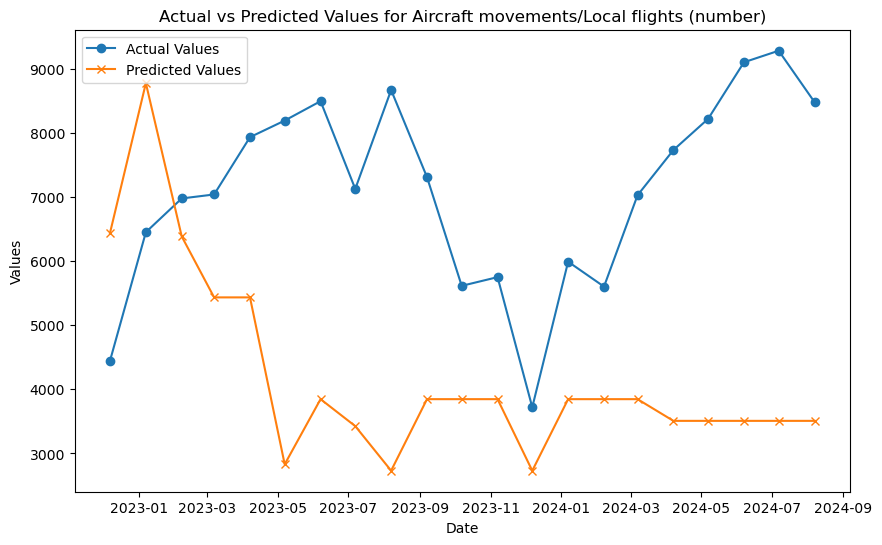

Mean Squared Error for Aircraft movements/Cross-country flights (number): 353198556.666653
R^2 for Aircraft movements/Cross-country flights (number): -10.35222528959485



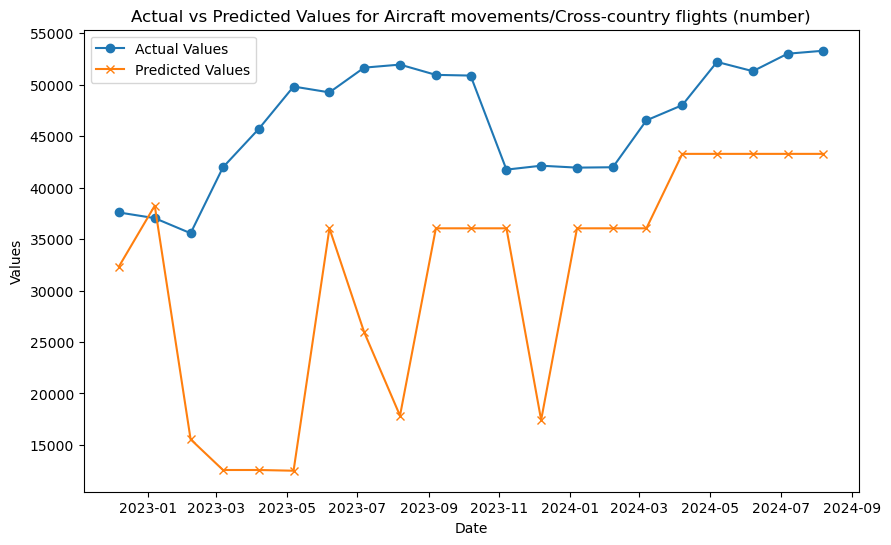

Mean Squared Error for Commercial air traffic/Passengers/Total passengers/Total passengers (number): 9553963120121.238
R^2 for Commercial air traffic/Passengers/Total passengers/Total passengers (number): -9.930904528308101



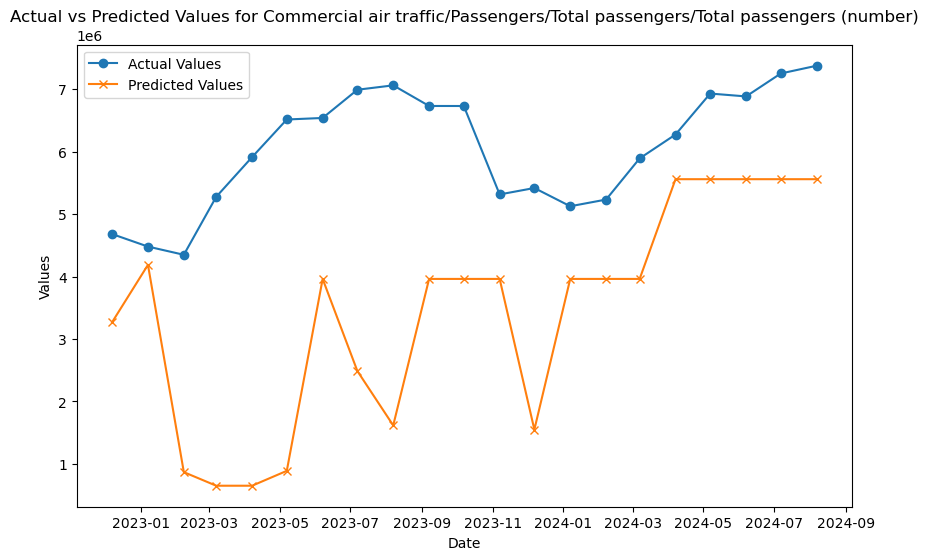

Mean Squared Error for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 83371226.68327199
R^2 for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): -0.7888417631960805



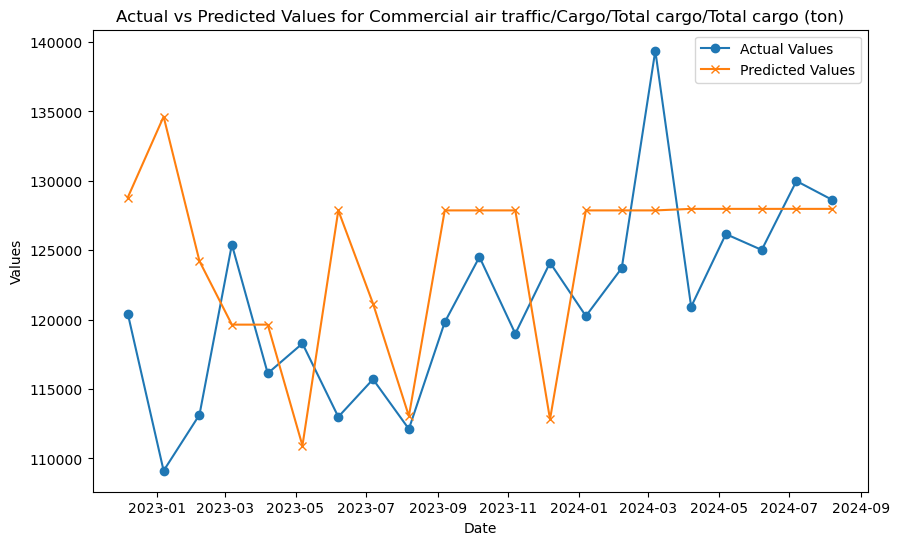

Mean Squared Error for Commercial air traffic/Mail/Total mail/Total mail (ton): 589141.0409849604
R^2 for Commercial air traffic/Mail/Total mail/Total mail (ton): -99.05283512187107



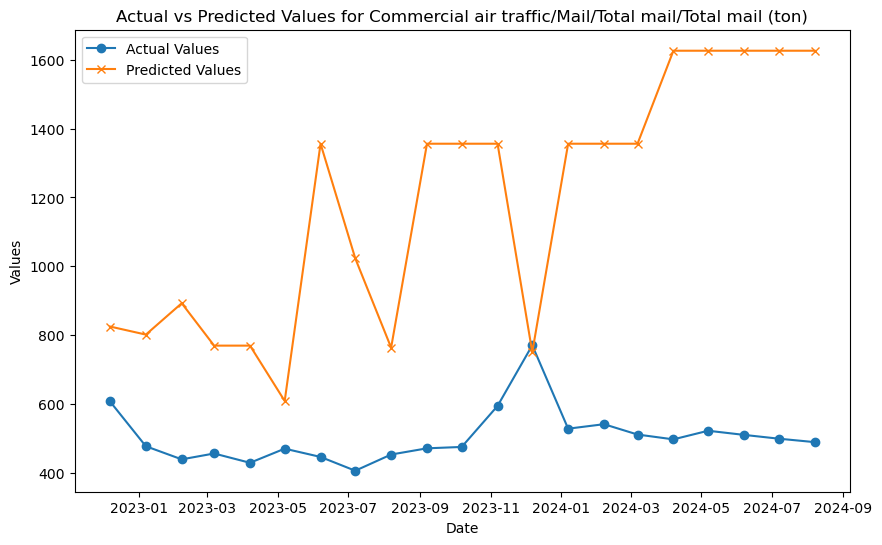

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# List of variables for regression analysis
variables = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# Prepare data
X = merged_df[['new_cases']]  # Convert X to DataFrame

# Iterate over each variable and perform random forest regression
for variable in variables:
    Y = merged_df[[variable]]  # Convert Y to DataFrame
    
    # Split the data into training and testing sets without shuffling
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
    
    # Create random forest regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Fit the model
    model.fit(X_train, Y_train.values.ravel())
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(Y_test, y_pred)
    print(f"Mean Squared Error for {variable}: {mse}")
    
    # Calculate R^2
    r_squared = r2_score(Y_test, y_pred)
    print(f"R^2 for {variable}: {r_squared}\n")
    
    # Plot actual vs predicted values as line plot
    plt.figure(figsize=(10, 6))
    plt.plot(Y_test.index, Y_test.values, label='Actual Values', marker='o')
    plt.plot(Y_test.index, y_pred, label='Predicted Values', marker='x')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Actual vs Predicted Values for {variable}')
    plt.legend()
    plt.show()

### Adding Vaccination and Death Data for Correlation Analysis

In this section, we will incorporate vaccination and COVID-19 death data to explore potential correlations with aviation-related variables. The steps include:

1. **Data Integration**: Merge the monthly vaccination and death data with the existing dataset.
2. **Correlation Calculation**: Calculate the correlation coefficients between the number of new COVID-19 cases, vaccination data, death data, and aviation-related variables.
3. **Analysis**: Analyze the correlation coefficients to understand the relationships between these variables.

The variables analyzed include:

- **Aviation-related Variables**:
    - Aircraft movements/Local flights (number)
    - Aircraft movements/Cross-country flights (number)
    - Commercial air traffic/Passengers/Total passengers/Total passengers (number)
    - Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
    - Commercial air traffic/Mail/Total mail/Total mail (ton)

- **COVID-19 Related Variables**:
    - New COVID-19 cases
    - Monthly deaths
    - Monthly vaccinations

By examining these correlations, we aim to uncover insights into how the pandemic and vaccination efforts have impacted aviation activities.

In [11]:
import pandas as pd

# 读取 new_deaths.csv 文件
new_deaths_df = pd.read_csv('new_deaths.csv')

# 假设 new_deaths_df 有一个 'date' 列和一个 'World' 列
# 将 'date' 列转换为 datetime 类型
new_deaths_df['date'] = pd.to_datetime(new_deaths_df['date'])

# 按月汇总 'World' 列的数据
new_deaths_df['month'] = new_deaths_df['date'].dt.to_period('M')
monthly_deaths = new_deaths_df.groupby('month')['World'].sum().reset_index()

# 读取 vaccinations.csv 文件
vaccinations_df = pd.read_csv('vaccinations.csv')

# 假设 vaccinations_df 有一个 'date' 列和一个 'people_fully_vaccinated' 列
# 将 'date' 列转换为 datetime 类型
vaccinations_df['date'] = pd.to_datetime(vaccinations_df['date'])

# 按月汇总 'people_fully_vaccinated' 列的数据
vaccinations_df['month'] = vaccinations_df['date'].dt.to_period('M')
monthly_vaccinations = vaccinations_df.groupby('month')['people_fully_vaccinated'].sum().reset_index()

# 显示结果
print("Monthly Deaths:")
print(monthly_deaths)
print("\nMonthly Vaccinations:")
print(monthly_vaccinations)

Monthly Deaths:
      month   World
0   2020-01      62
1   2020-02    2409
2   2020-03   35799
3   2020-04  178886
4   2020-05  184334
5   2020-06  144336
6   2020-07  162506
7   2020-08  219379
8   2020-09  160002
9   2020-10  156799
10  2020-11  323684
11  2020-12  329388
12  2021-01  484000
13  2021-02  303230
14  2021-03  253439
15  2021-04  333155
16  2021-05  440629
17  2021-06  258619
18  2021-07  234213
19  2021-08  345972
20  2021-09  246781
21  2021-10  247085
22  2021-11  204631
23  2021-12  197605
24  2022-01  268246
25  2022-02  281424
26  2022-03  175992
27  2022-04   85772
28  2022-05   61087
29  2022-06   38226
30  2022-07   72771
31  2022-08   65628
32  2022-09   46160
33  2022-10   55618
34  2022-11   40252
35  2022-12   57961
36  2023-01   85959
37  2023-02   96106
38  2023-03   26682
39  2023-04   26841
40  2023-05   15372
41  2023-06    8226
42  2023-07    5262
43  2023-08    6625
44  2023-09    8827
45  2023-10   13988
46  2023-11   10707
47  2023-12   18055
48  

These coefficients indicate the strength and direction of the linear relationship between each variable and the number of new COVID-19 cases.
### Correlation with Deaths and Vaccinations

In this section, we calculate the correlation coefficient between each variable and the number of deaths as well as the number of vaccinations. The variables analyzed include:

- Aircraft movements/Local flights (number)
- Aircraft movements/Cross-country flights (number)
- Commercial air traffic/Passengers/Total passengers/Total passengers (number)
- Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
- Commercial air traffic/Mail/Total mail/Total mail (ton)

The correlation coefficients with deaths are as follows:

- **Aircraft movements/Local flights (number)**: 0.063620
- **Aircraft movements/Cross-country flights (number)**: -0.760796
- **Commercial air traffic/Passengers/Total passengers/Total passengers (number)**: -0.810616
- **Commercial air traffic/Cargo/Total cargo/Total cargo (ton)**: 0.470905
- **Commercial air traffic/Mail/Total mail/Total mail (ton)**: 0.099851

The correlation coefficients with vaccinations are as follows:

- **Aircraft movements/Local flights (number)**: 0.472702
- **Aircraft movements/Cross-country flights (number)**: 0.430443
- **Commercial air traffic/Passengers/Total passengers/Total passengers (number)**: 0.422943
- **Commercial air traffic/Cargo/Total cargo/Total cargo (ton)**: -0.495549
- **Commercial air traffic/Mail/Total mail/Total mail (ton)**: -0.821211

These coefficients indicate the strength and direction of the linear relationship between each variable and the number of deaths as well as the number of vaccinations.

In [12]:
# Convert 'month' column to string format for merging
monthly_deaths['month'] = monthly_deaths['month'].astype(str)
monthly_vaccinations['month'] = monthly_vaccinations['month'].astype(str)

# Merge monthly_deaths and monthly_vaccinations with merged_df on 'month'
merged_df = pd.merge(merged_df, monthly_deaths, on='month', how='left', suffixes=('', '_deaths'))
merged_df = pd.merge(merged_df, monthly_vaccinations, on='month', how='left', suffixes=('', '_vaccinations'))

# Rename the columns for clarity
merged_df.rename(columns={'World': 'monthly_deaths', 'people_fully_vaccinated': 'monthly_vaccinations'}, inplace=True)
# Fill all NaN values in merged_df with 0
merged_df.fillna(0, inplace=True)

In [14]:
# 选择感兴趣的列
columns_of_interest = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# 分别计算五个变量和 monthly_deaths 的相关系数
correlation_with_deaths = {}
for column in columns_of_interest:
    correlation_with_deaths[column] = merged_df[column].corr(merged_df['monthly_deaths'])

# 分别计算五个变量和 monthly_vaccinations 的相关系数
correlation_with_vaccinations = {}
for column in columns_of_interest:
    correlation_with_vaccinations[column] = merged_df[column].corr(merged_df['monthly_vaccinations'])

# 显示相关系数
print("Correlation with monthly_deaths:")
print(correlation_with_deaths)
print("\nCorrelation with monthly_vaccinations:")
print(correlation_with_vaccinations)


Correlation with monthly_deaths:
{'Aircraft movements/Local flights (number)': 0.06361961792405615, 'Aircraft movements/Cross-country flights (number)': -0.7607962205256505, 'Commercial air traffic/Passengers/Total passengers/Total passengers (number)': -0.8106163757550144, 'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)': 0.47090502968447256, 'Commercial air traffic/Mail/Total mail/Total mail (ton)': 0.09985133874077767}

Correlation with monthly_vaccinations:
{'Aircraft movements/Local flights (number)': 0.47270168893083586, 'Aircraft movements/Cross-country flights (number)': 0.4304426616418109, 'Commercial air traffic/Passengers/Total passengers/Total passengers (number)': 0.4229431088242651, 'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)': -0.4955494370638401, 'Commercial air traffic/Mail/Total mail/Total mail (ton)': -0.8212112265927651}


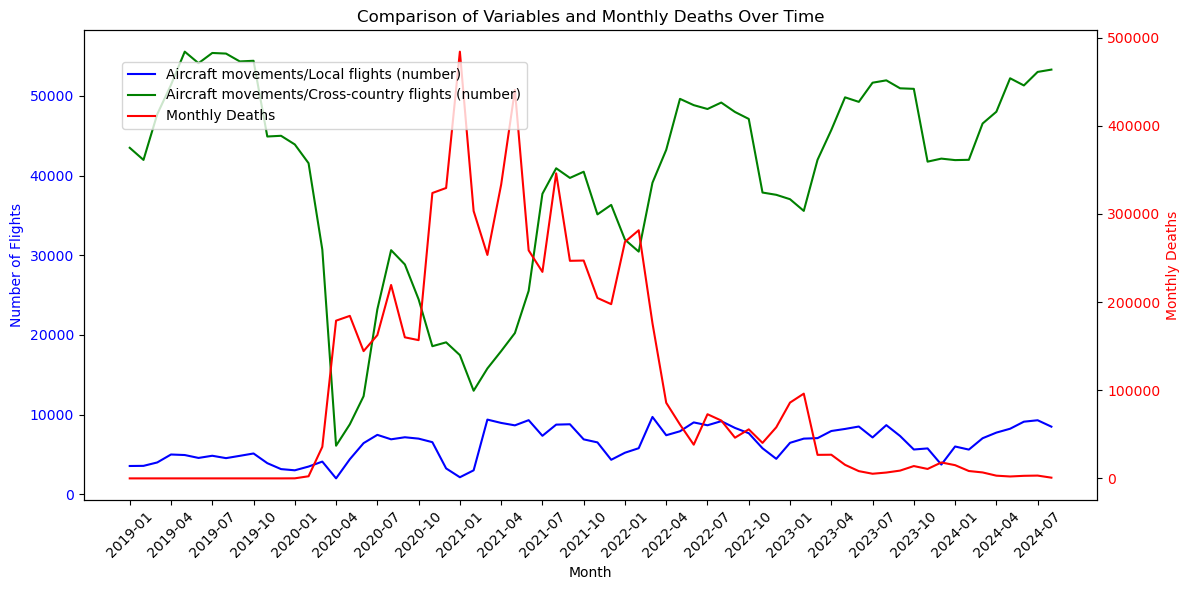

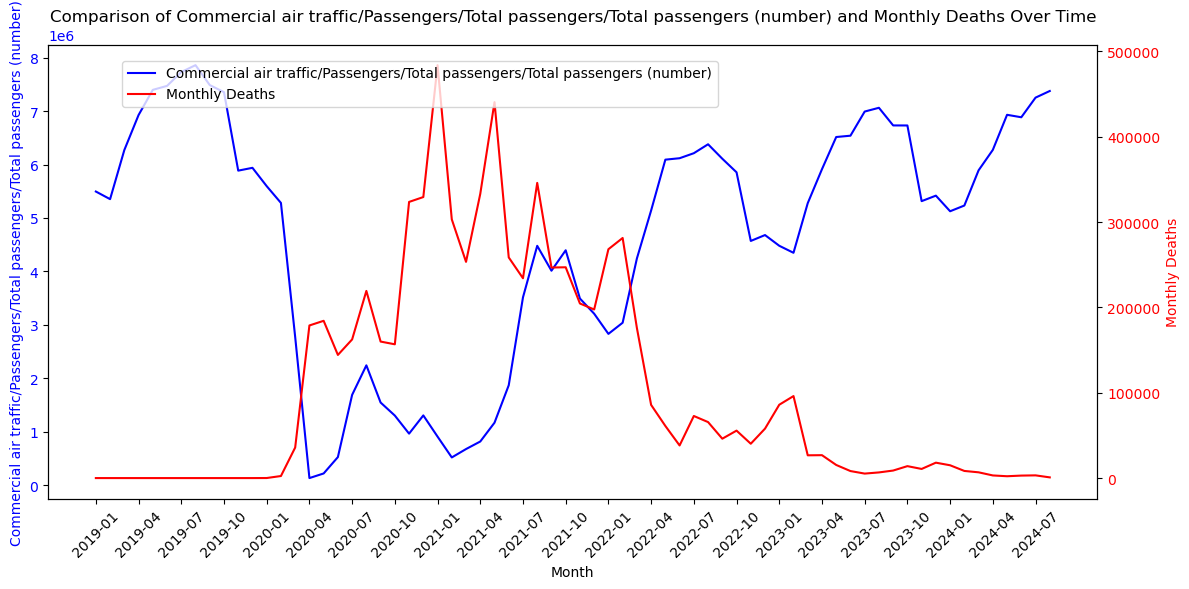

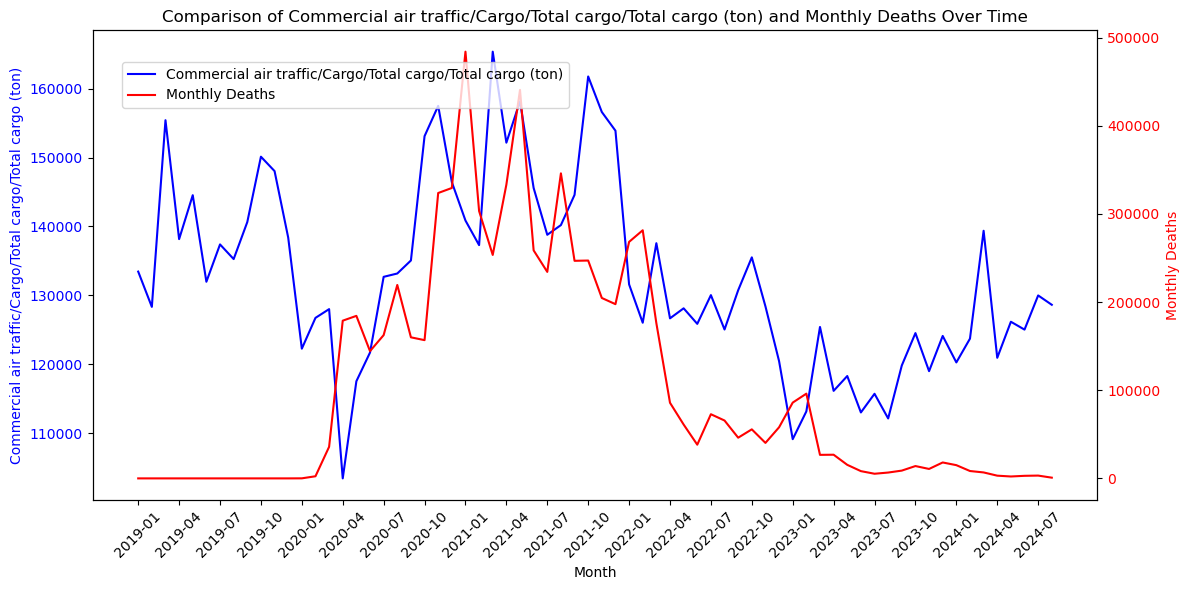

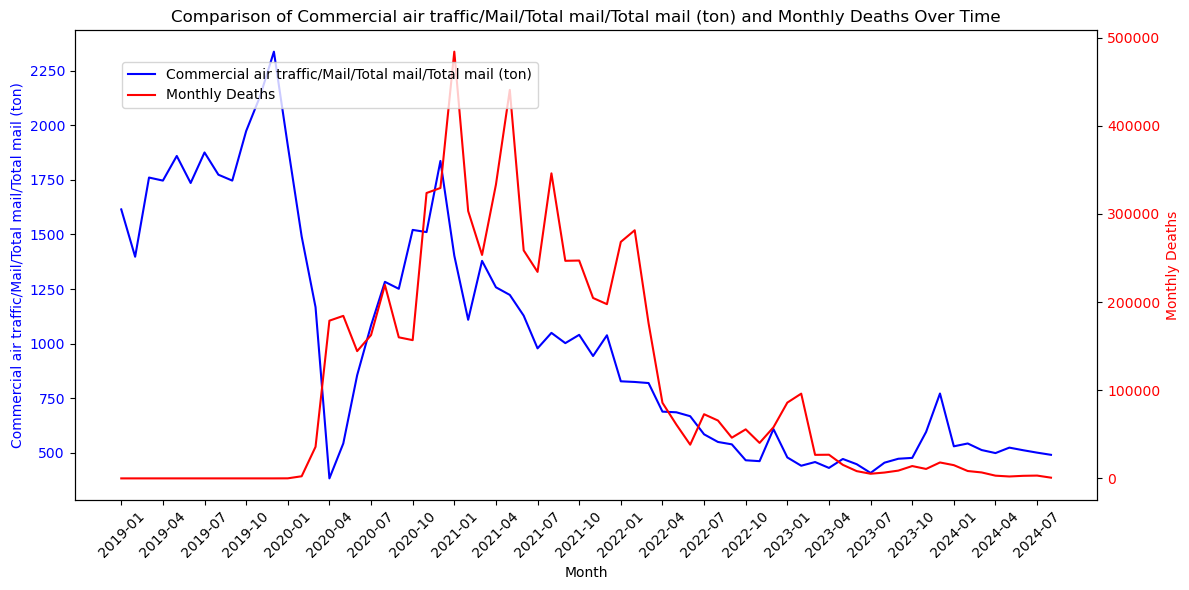

In [40]:
import matplotlib.pyplot as plt

# Define the variables to plot
variables_to_plot = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first two variables
ax1.plot(merged_df['month'], merged_df[variables_to_plot[0]], label=variables_to_plot[0], color='blue')
ax1.plot(merged_df['month'], merged_df[variables_to_plot[1]], label=variables_to_plot[1], color='green')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Flights', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(ax1.get_xticks()[::3])  # Show every third label
plt.xticks(rotation=45)

# Create a second y-axis for monthly deaths
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['monthly_deaths'], label='Monthly Deaths', color='red')
ax2.set_ylabel('Monthly Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title
plt.title('Comparison of Variables and Monthly Deaths Over Time')

# Show the legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.rcParams.update({'xtick.labelsize': 10})  # Update the font size for x-axis labels

# Show the plot
plt.show()

# Plot each remaining variable with monthly deaths
for variable in variables_to_plot[2:]:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the variable
    ax1.plot(merged_df['month'], merged_df[variable], label=variable, color='blue')
    ax1.set_xlabel('Month')
    ax1.set_ylabel(variable, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(ax1.get_xticks()[::3])  # Show every third label
    plt.xticks(rotation=45)

    # Create a second y-axis for monthly deaths
    ax2 = ax1.twinx()
    ax2.plot(merged_df['month'], merged_df['monthly_deaths'], label='Monthly Deaths', color='red')
    ax2.set_ylabel('Monthly Deaths', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the title
    plt.title(f'Comparison of {variable} and Monthly Deaths Over Time')

    # Show the legend
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.rcParams.update({'xtick.labelsize': 10})  # Update the font size for x-axis labels

    # Show the plot
    plt.show()


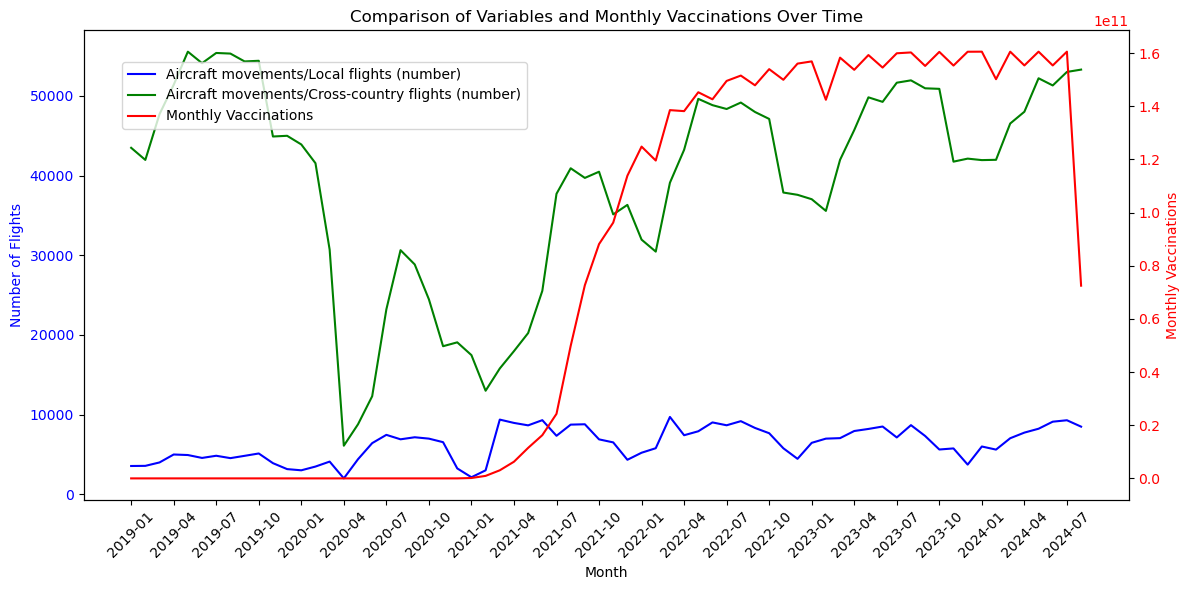

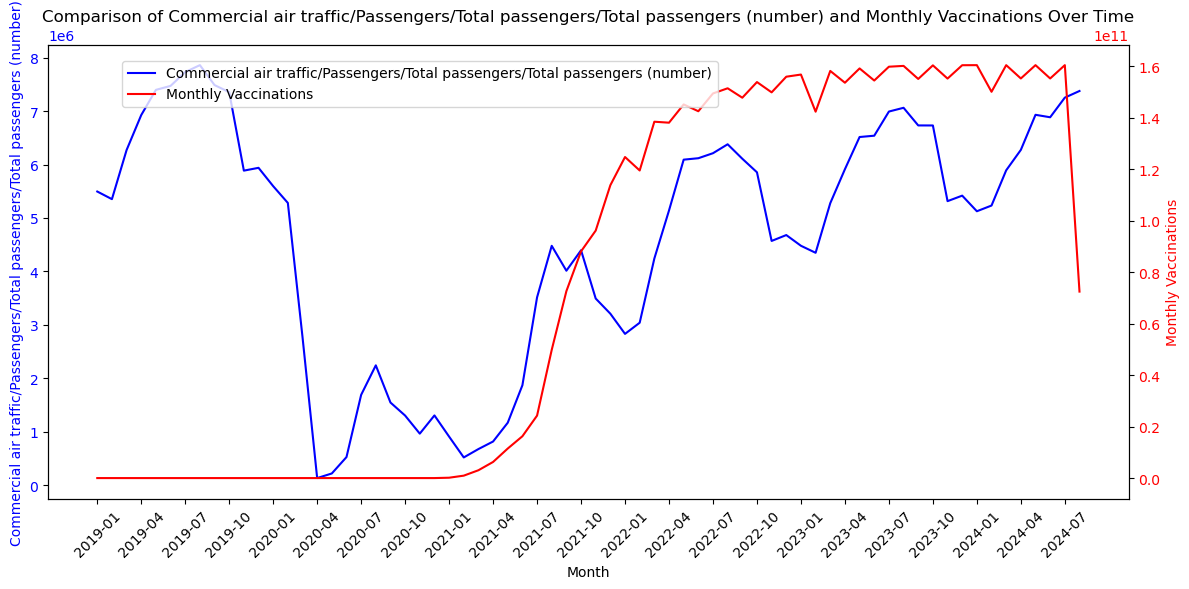

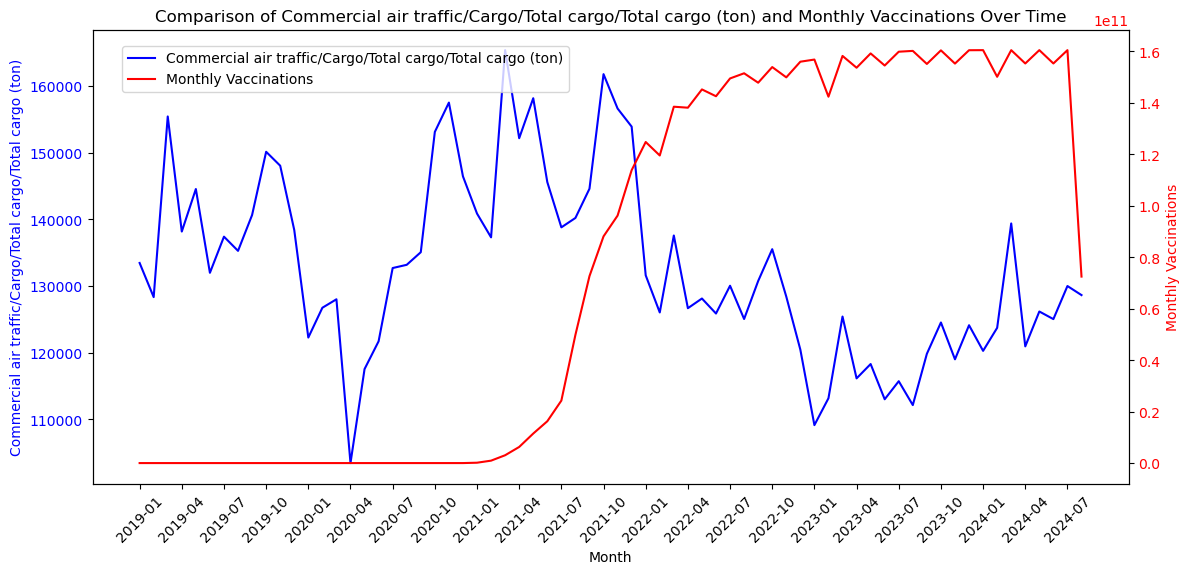

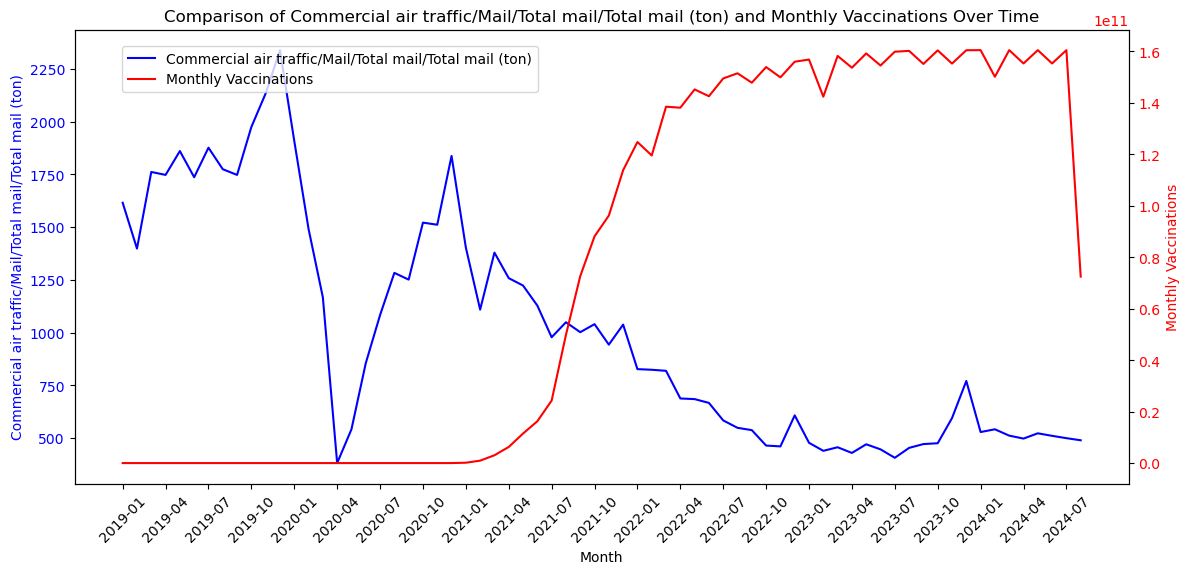

In [39]:
# Plot the first two variables with monthly vaccinations
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first variable
ax1.plot(merged_df['month'], merged_df[variables_to_plot[0]], label=variables_to_plot[0], color='blue')
ax1.plot(merged_df['month'], merged_df[variables_to_plot[1]], label=variables_to_plot[1], color='green')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Flights', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(ax1.get_xticks()[::3])  # Show every third label
plt.xticks(rotation=45)

# Create a second y-axis for monthly vaccinations
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['monthly_vaccinations'], label='Monthly Vaccinations', color='red')
ax2.set_ylabel('Monthly Vaccinations', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title
plt.title('Comparison of Variables and Monthly Vaccinations Over Time')

# Show the legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.rcParams.update({'xtick.labelsize': 10})  # Update the font size for x-axis labels

# Show the plot
plt.show()

# Plot each of the last three variables with monthly vaccinations
for variable in variables_to_plot[2:]:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the variable
    ax1.plot(merged_df['month'], merged_df[variable], label=variable, color='blue')
    ax1.set_xlabel('Month')
    ax1.set_ylabel(variable, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(ax1.get_xticks()[::3])  # Show every third label
    plt.xticks(rotation=45)

    # Create a second y-axis for monthly vaccinations
    ax2 = ax1.twinx()
    ax2.plot(merged_df['month'], merged_df['monthly_vaccinations'], label='Monthly Vaccinations', color='red')
    ax2.set_ylabel('Monthly Vaccinations', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the title
    plt.title(f'Comparison of {variable} and Monthly Vaccinations Over Time')

    # Show the legend
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
    plt.rcParams.update({'xtick.labelsize': 10})  # Update the font size for x-axis labels

    # Show the plot
    plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
# Function to calculate additional evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Prepare data
X = merged_df[['new_cases', 'monthly_deaths', 'monthly_vaccinations']]  # 自变量

# 结果保存变量
regression_results = {}

# 进行多元线性回归
for variable in variables:
    Y = merged_df[[variable]]  # 因变量
    
    # 创建线性回归模型
    model = LinearRegression()
    
    # 拟合模型
    model.fit(X, Y)
    
    # 预测
    y_pred = model.predict(X)
    
    # 计算评价指标
    mse, r2 = evaluate_model(Y, y_pred)
    
    # 保存回归系数和截距
    regression_results[variable] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_[0],
        'r_squared': model.score(X, Y),
        'mse': mse,
        'r2': r2
    }

# 显示结果
for variable, result in regression_results.items():
    print(f"Variable: {variable}")
    print(f"  Coefficients: {result['coefficient']}")
    print(f"  Intercept: {result['intercept']}")
    print(f"  R^2: {result['r_squared']}")
    print(f"  Mean Squared Error: {result['mse']}")
    print(f"  R^2 (calculated): {result['r2']}\n")
# Prepare data

Variable: Aircraft movements/Local flights (number)
  Coefficients: [-2.32513874e-05  6.04453098e-03  1.82030823e-08]
  Intercept: 4576.655107404027
  R^2: 0.3019985773967159
  Mean Squared Error: 2970865.4373463653
  R^2 (calculated): 0.3019985773967159

Variable: Aircraft movements/Cross-country flights (number)
  Coefficients: [ 3.89073165e-05 -7.46610032e-02  3.19174187e-08]
  Intercept: 44263.804356110035
  R^2: 0.6163375491395153
  Mean Squared Error: 63565748.32707952
  R^2 (calculated): 0.6163375491395153

Variable: Commercial air traffic/Passengers/Total passengers/Total passengers (number)
  Coefficients: [ 4.09967948e-03 -1.39937630e+01  5.05481230e-06]
  Intercept: 5683170.126069027
  R^2: 0.6845344705977535
  Mean Squared Error: 1624713261638.5752
  R^2 (calculated): 0.6845344705977535

Variable: Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
  Coefficients: [-2.54569927e-05  3.93956157e-02 -6.90902181e-08]
  Intercept: 134256.06525329815
  R^2: 0.3519661350883

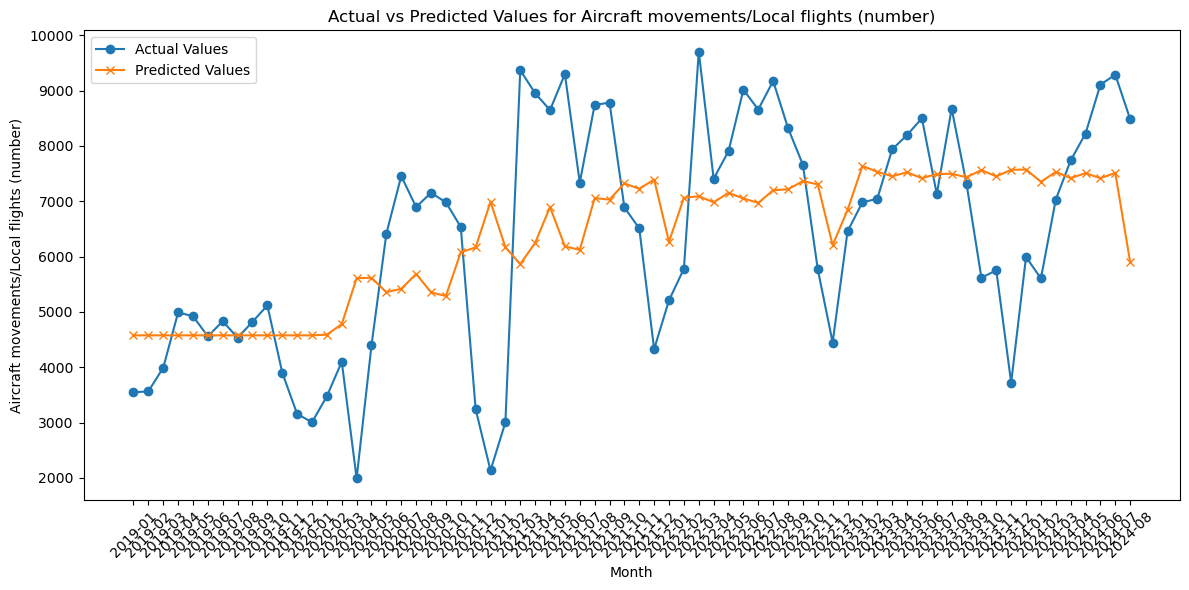

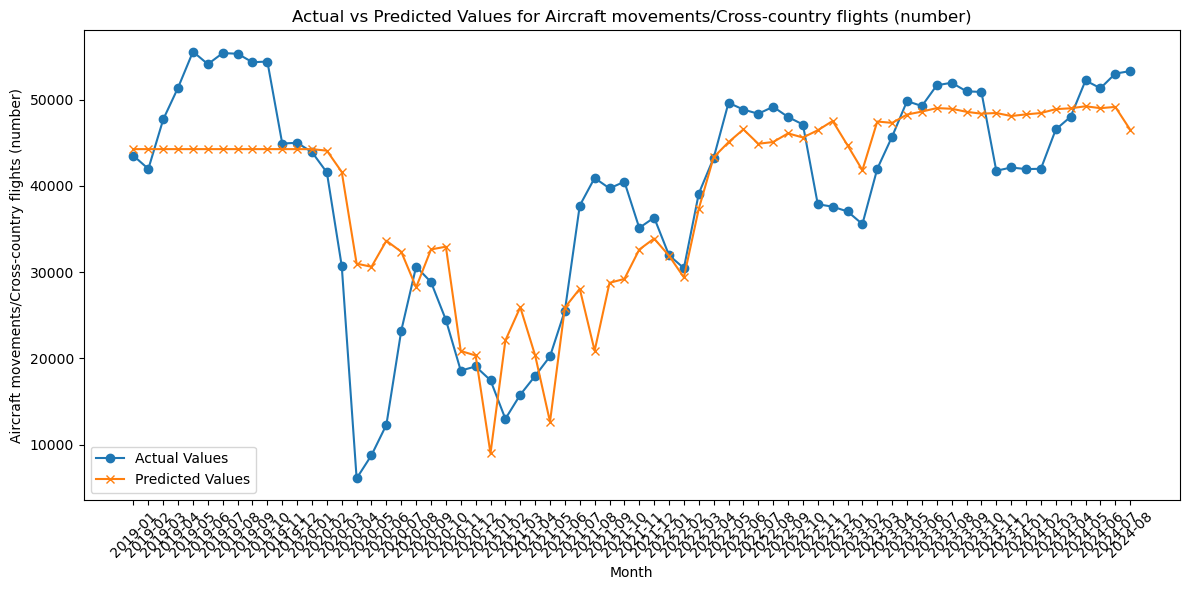

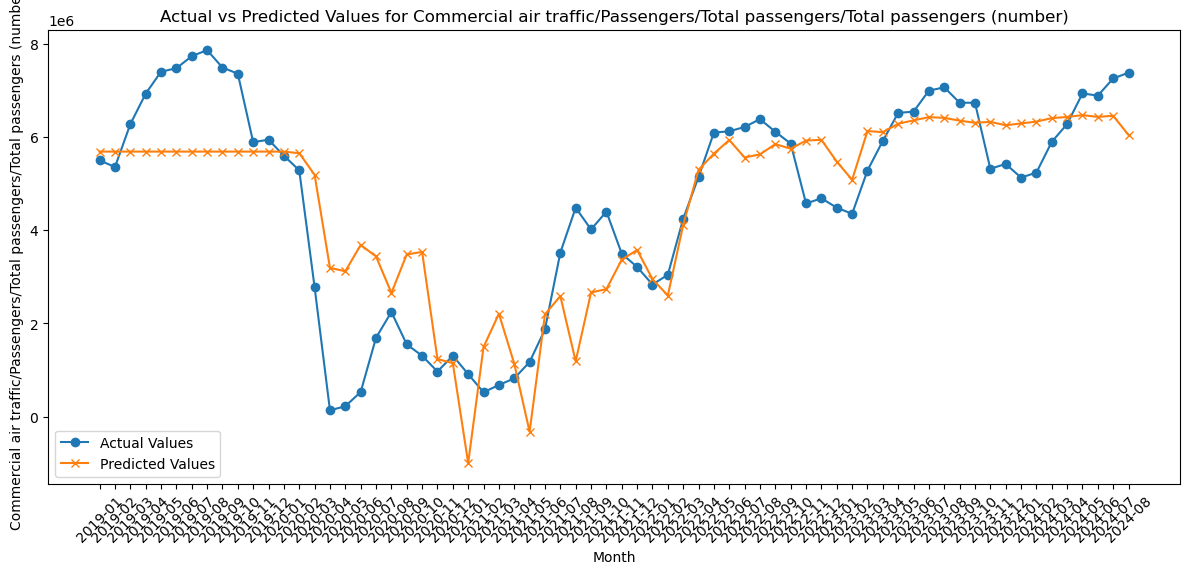

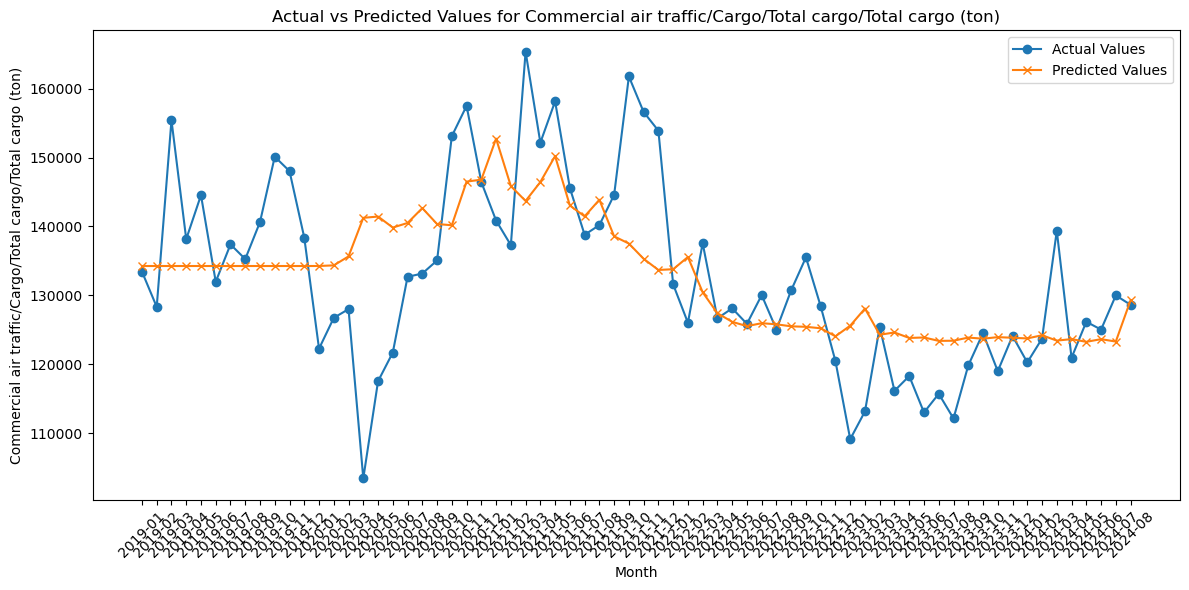

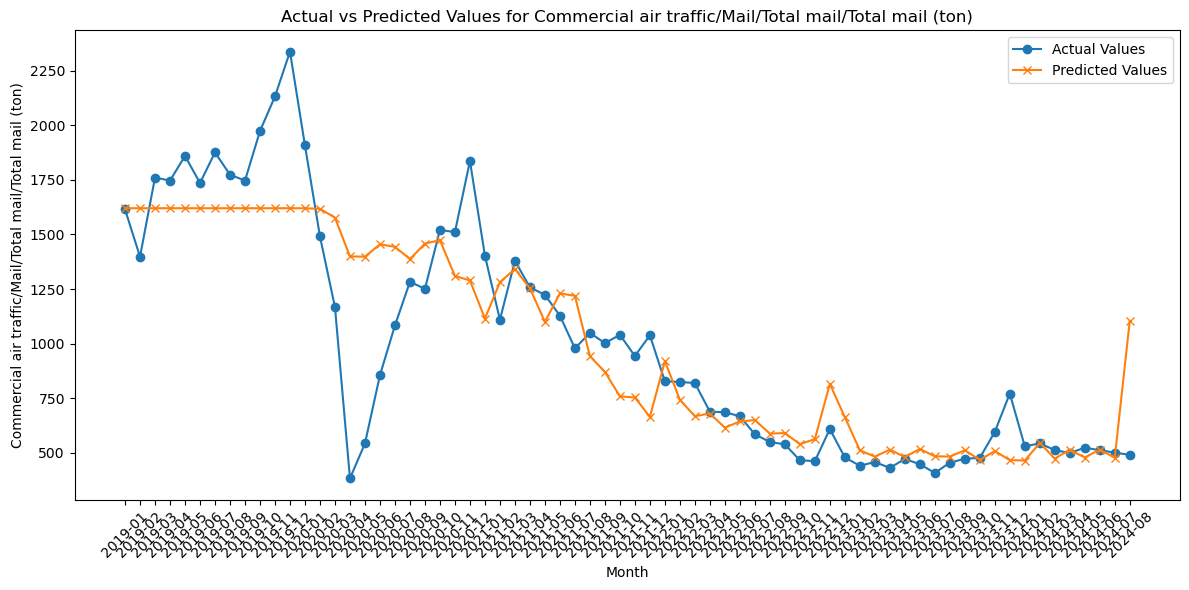

In [44]:
# Prepare data
X = merged_df[['new_cases', 'monthly_deaths', 'monthly_vaccinations']]  # 自变量

# Iterate over each variable and perform linear regression
for variable in variables:
    Y = merged_df[[variable]]  # 因变量
    
    # 创建线性回归模型
    model = LinearRegression()
    
    # 拟合模型
    model.fit(X, Y)
    
    # 预测
    y_pred = model.predict(X)
    
    # 绘制真实值和预测值曲线
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['month'], Y, label='Actual Values', marker='o')
    plt.plot(merged_df['month'], y_pred, label='Predicted Values', marker='x')
    plt.xlabel('Month')
    plt.ylabel(variable)
    plt.title(f'Actual vs Predicted Values for {variable}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()